In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('heart.csv')

In [3]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print(dataset.shape)

(918, 12)


In [5]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


No NUll Value here

In [8]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# EDA

<AxesSubplot:>

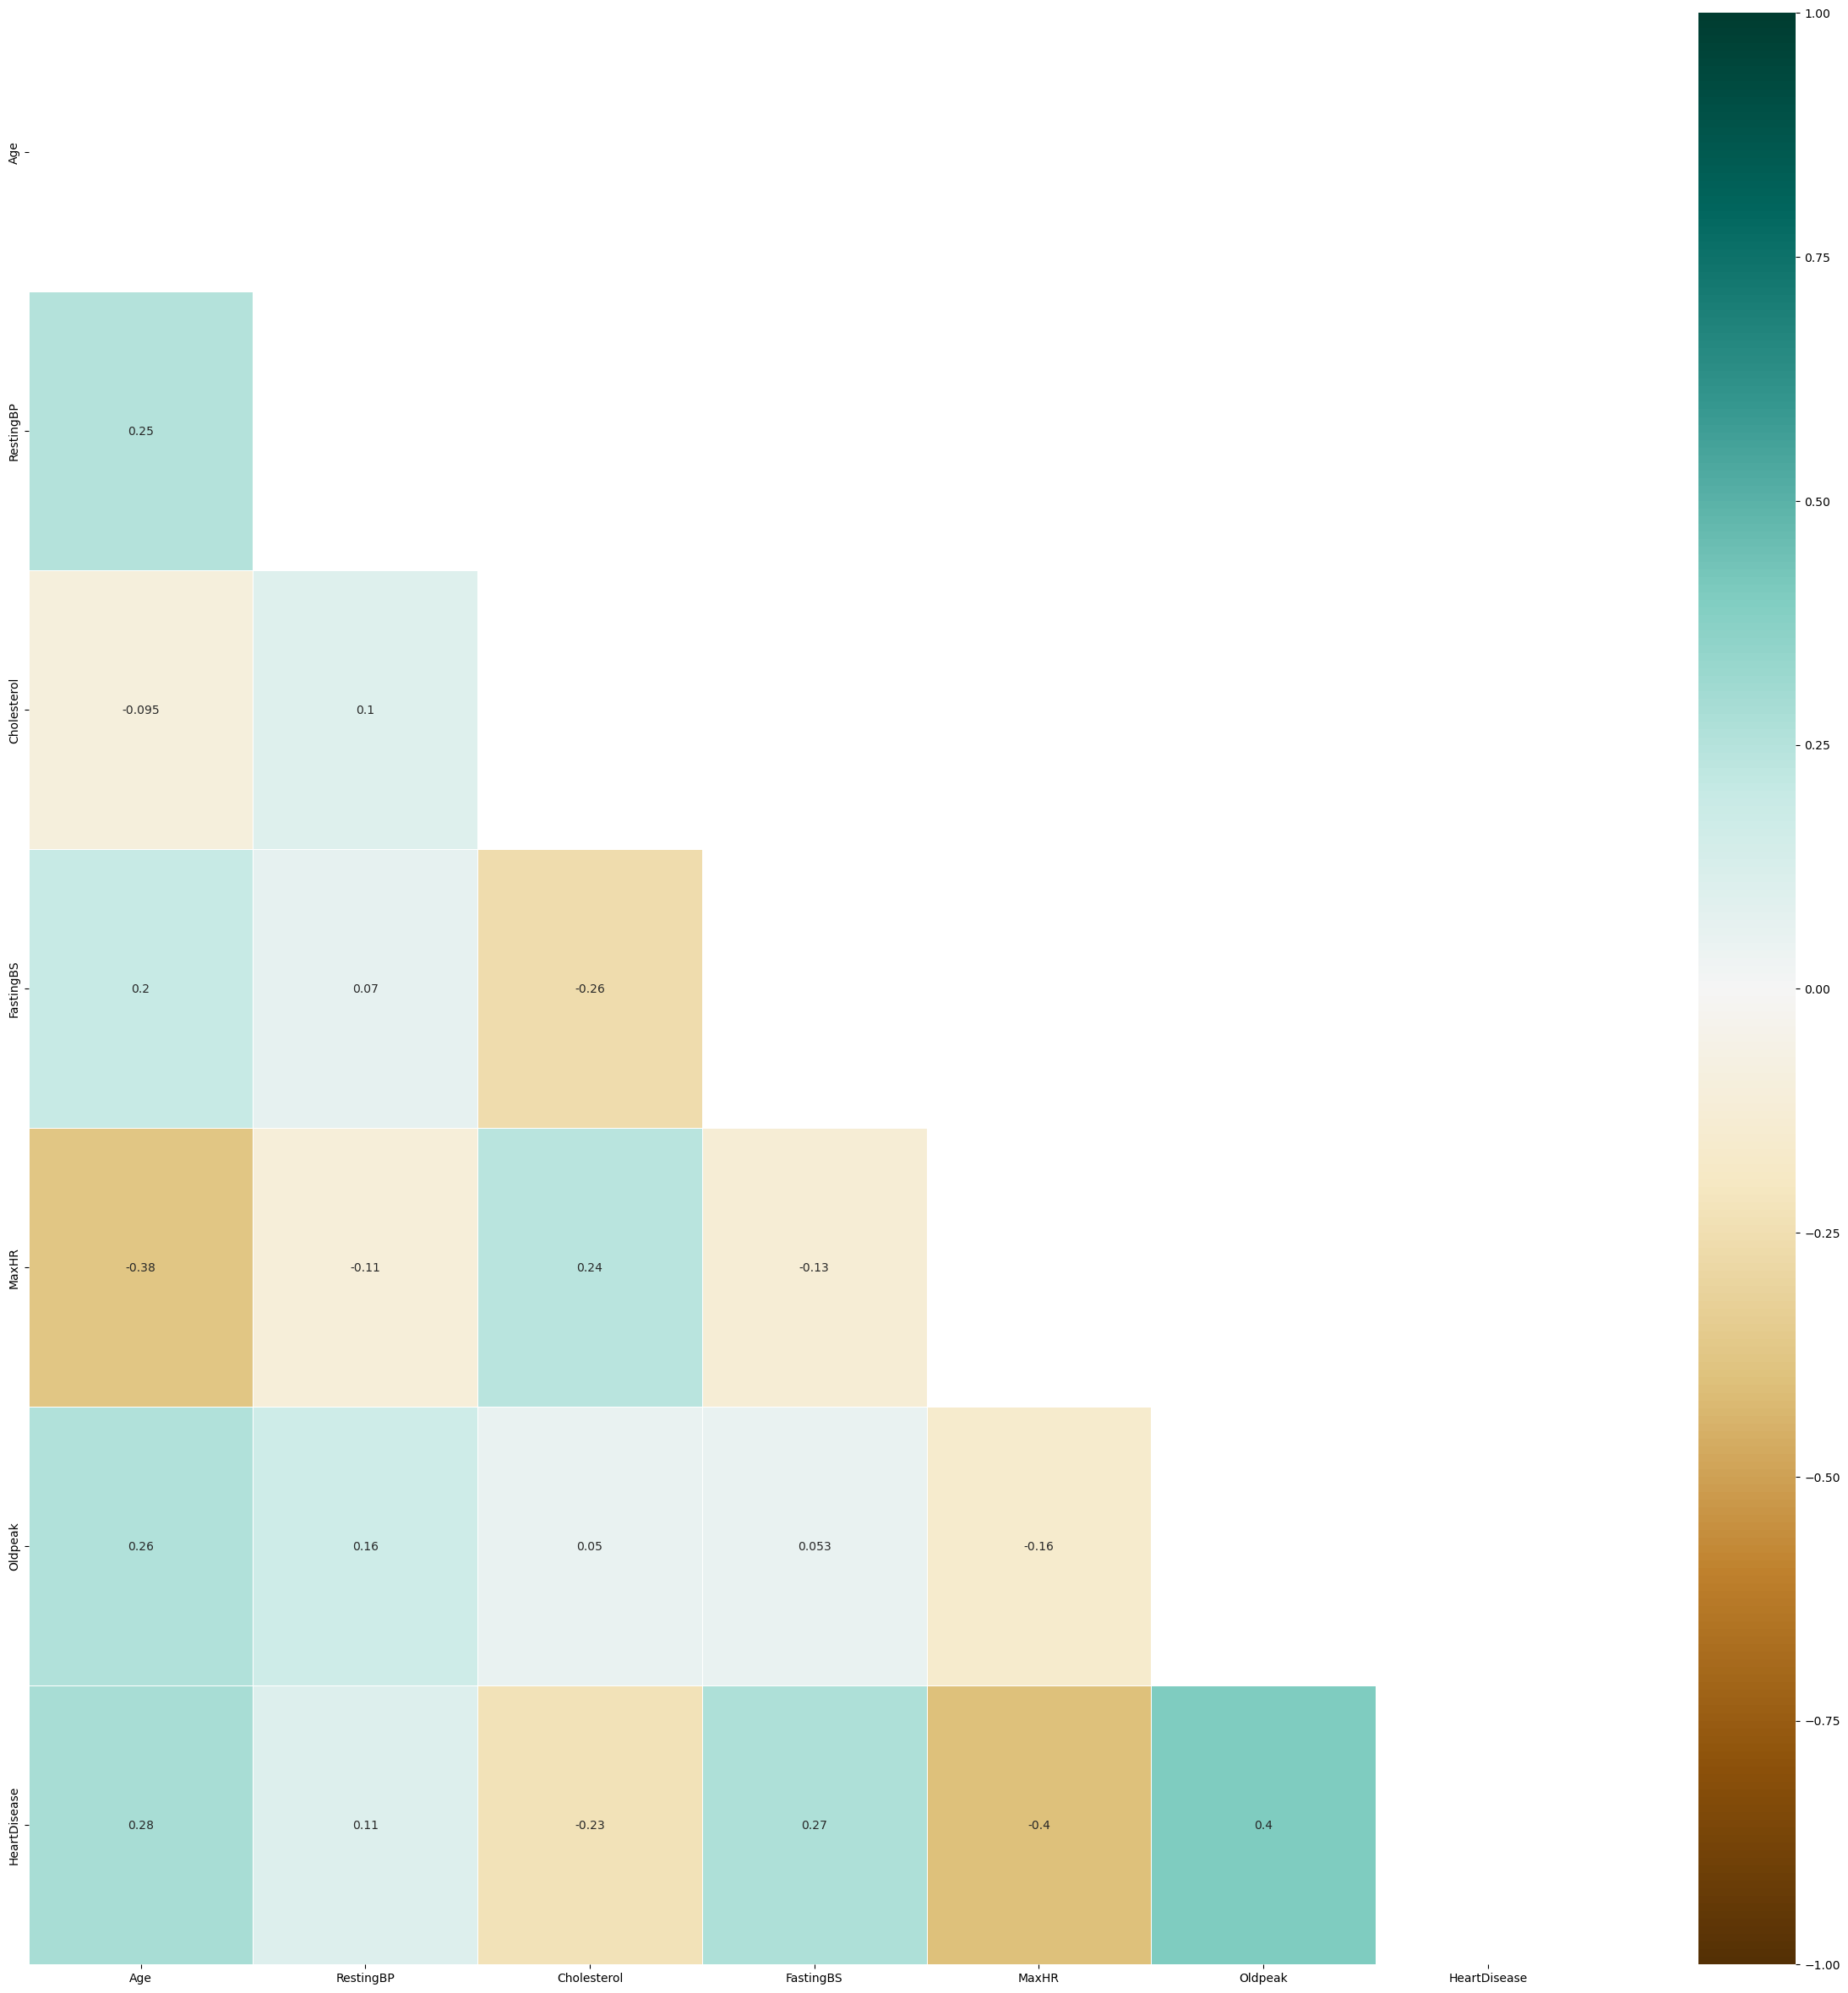

In [9]:
corr = dataset.corr()
plt.figure(figsize=(30,30))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,cmap='BrBG', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False)

In [10]:
dataset['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [11]:
# Percentage of patients have and do not have heart disease
dataset['HeartDisease'].value_counts()/dataset.shape[0]*100

1    55.337691
0    44.662309
Name: HeartDisease, dtype: float64

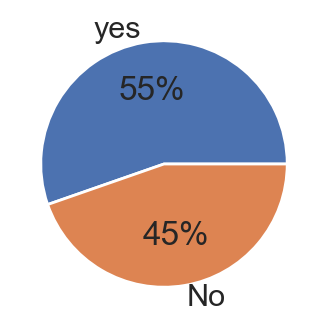

In [12]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = dataset['HeartDisease'].value_counts().values
sns.set_theme(context='poster')
plt.figure(figsize=(4,4))
plt.title( '',color="Black",fontsize=18)

plt.pie(values, labels=labels, autopct='%1.0f%%')
#plt.title(' People who got Heart Disease')
plt.show()

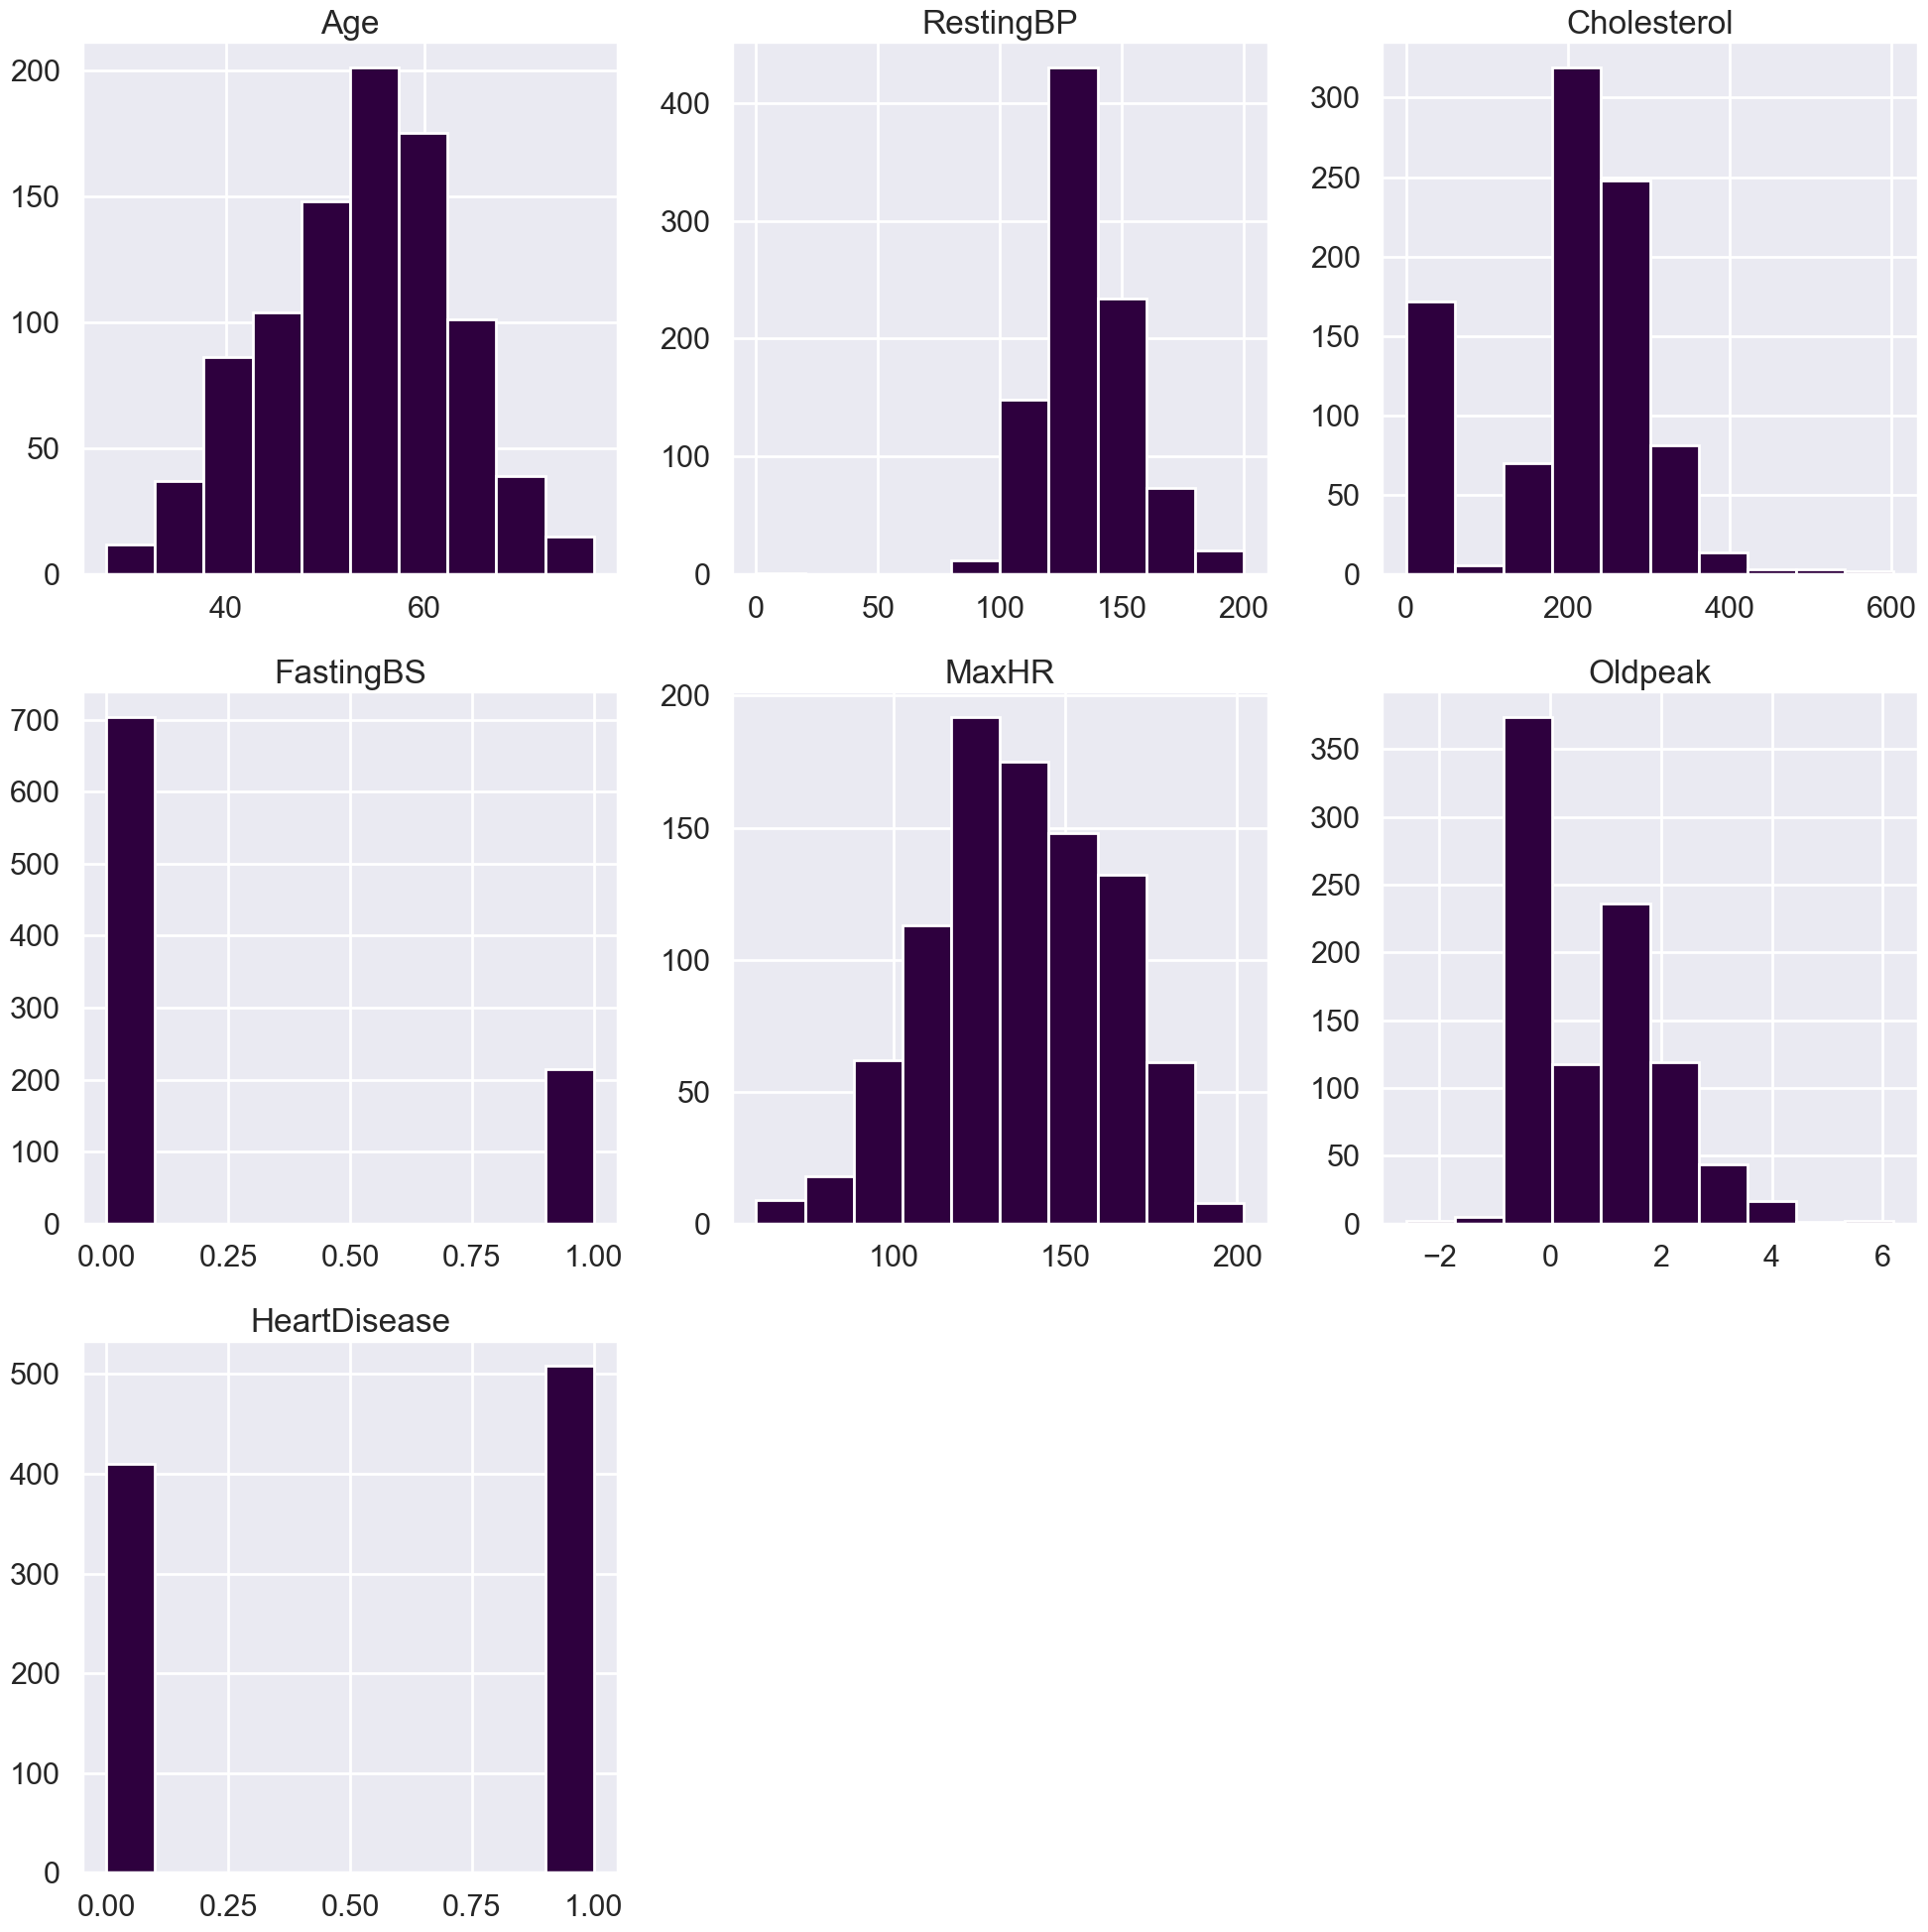

In [13]:
dataset.hist(figsize = (20,20),color='#2e003e')
plt.tight_layout()
plt.show()

In [14]:
#checking the variance
dataset.var()

Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64

There is huge variance that's why we need to normalize this out.

# Normalized

In [15]:
dataset['MaxHR']=np.log(dataset['MaxHR'])

np.var(dataset[["RestingBP",'Cholesterol','MaxHR']])

RestingBP        342.400511
Cholesterol    11951.857429
MaxHR              0.038680
dtype: float64

# Numerical Features

In [16]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  7


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,5.147494,0.0,0
1,49,160,180,0,5.049856,1.0,1
2,37,130,283,0,4.584967,0.0,0
3,48,138,214,0,4.682131,1.5,1
4,54,150,195,0,4.804021,0.0,0


# Discrete Features

In [17]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 2


['FastingBS', 'HeartDisease']

# Continuous Features

In [18]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 5


['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Categorical Features

In [19]:
# Categorical Variables
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Handling Rare Categorical Feature

In [20]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['HeartDisease'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'every' column
dataset['Sex'] = lab.fit_transform(dataset['Sex'])
dataset['ChestPainType'] = lab.fit_transform(dataset['ChestPainType'])
dataset['RestingECG'] = lab.fit_transform(dataset['RestingECG'])
dataset['ExerciseAngina'] = lab.fit_transform(dataset['ExerciseAngina'])
dataset['ST_Slope'] = lab.fit_transform(dataset['ST_Slope'])

# Outliers

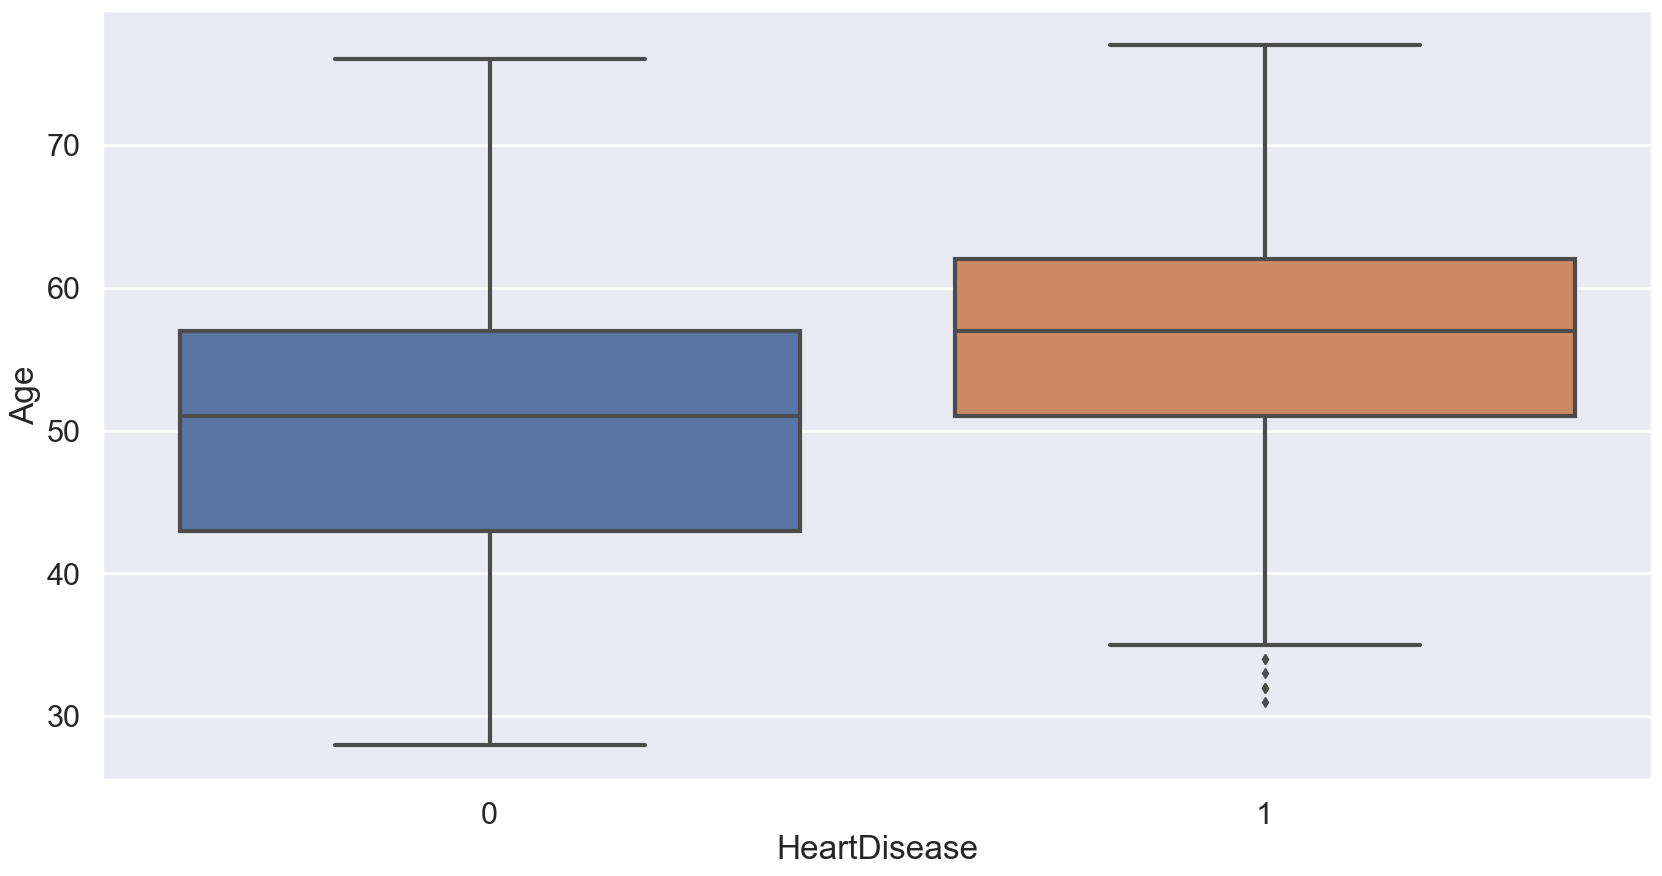

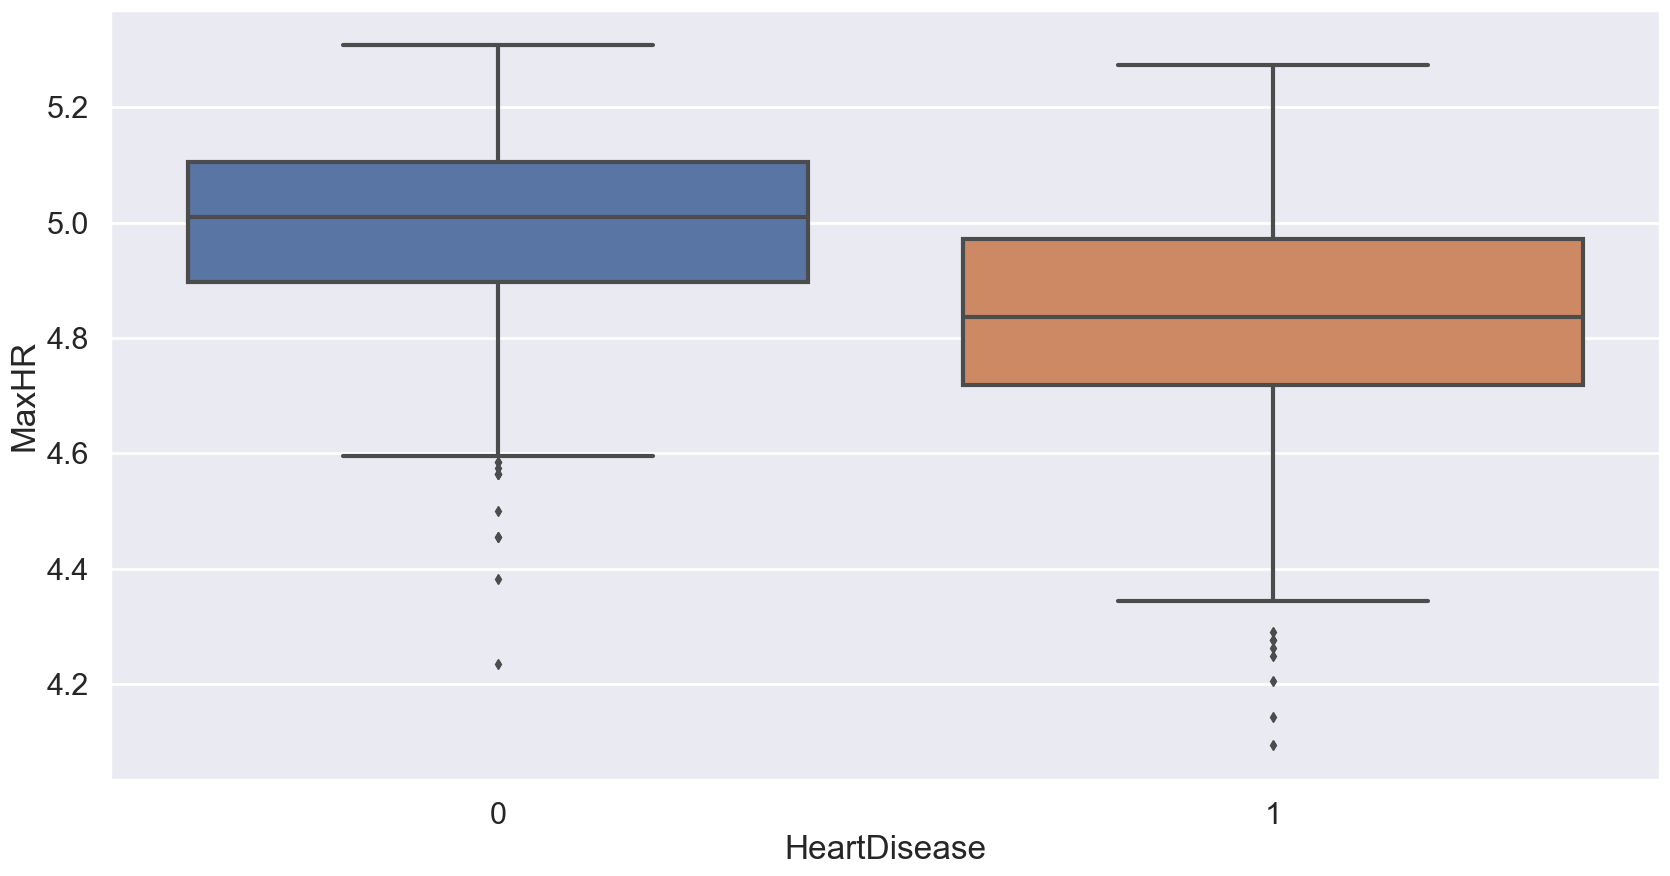

In [23]:
for feature in numerical_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.figure(figsize=(20,10))
        sns.boxplot(data,x='HeartDisease',y=feature)
        plt.show()

# Data splitting

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = dataset.drop('HeartDisease', axis = 1)
y = dataset['HeartDisease']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

# Data Balancing

SMOTE Technique

In [25]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 0)
xtrain, ytrain = smt.fit_resample(xtrain, ytrain)

print(f'Distribution AFTER balancing:\n{ytrain.value_counts()}')

Distribution AFTER balancing:
0    381
1    381
Name: HeartDisease, dtype: int64


# FEATURE SCALING

In [26]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

xtrain=ss.fit_transform(xtrain)
xtrain=mms.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)
xtest=mms.fit_transform(xtest)
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,5.147494,0,0.0,2,0
1,49,0,2,160,180,0,1,5.049856,0,1.0,1,1
2,37,1,1,130,283,0,2,4.584967,0,0.0,2,0
3,48,0,0,138,214,0,1,4.682131,1,1.5,1,1
4,54,1,2,150,195,0,1,4.804021,0,0.0,2,0


In [27]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['target']]
len(scaling_feature)

12

In [28]:
mask = ~np.isfinite(dataset)

# count the number of infinite or NaN values in each column
column_sum = mask.sum(axis=0)

# print the column(s) with infinite or NaN values and the number of occurrences
print(column_sum[column_sum > 0])

Series([], dtype: int64)


# FEATURE SELECTION

1. Variane Threshold

In [29]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(xtrain)

VarianceThreshold(threshold=0)

In [30]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [31]:
sum(var_thres.get_support())

11

this has not helped in selecting any feature on the basis of variance

2. MUTUAL INFORMATION FEATURE SELECTION

In [32]:
from sklearn.feature_selection import mutual_info_classif

In [33]:
mutual_info=mutual_info_classif(X,y)

In [34]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

ST_Slope          0.202168
ChestPainType     0.168503
ExerciseAngina    0.132213
Oldpeak           0.111178
MaxHR             0.105373
Cholesterol       0.078030
FastingBS         0.057726
Sex               0.051848
Age               0.039319
RestingECG        0.029316
RestingBP         0.018743
dtype: float64

<Figure size 1000x1000 with 0 Axes>

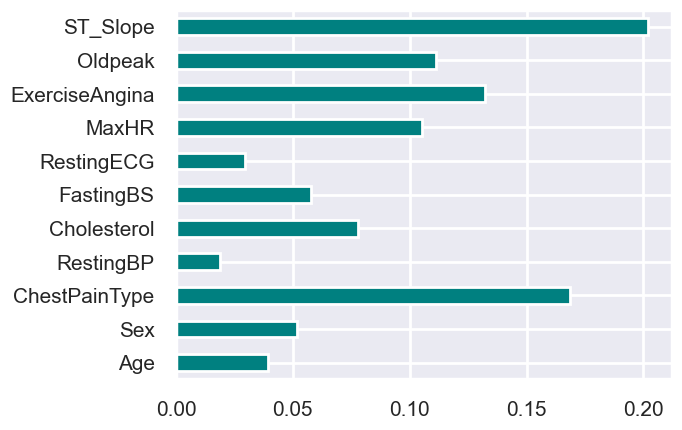

<Figure size 1000x1000 with 0 Axes>

In [35]:
from matplotlib.pyplot import figure
mutual_data.plot(kind='barh',color='teal',fontsize=15)
figure(figsize=(10, 10) )

In [36]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


3. FORWARD FEATURE SELECTION

In [37]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
forward_feature_selection= SequentialFeatureSelector(ExtraTreesClassifier(n_jobs=-1), k_features=(1,7), forward=True,floating=False, verbose=2,scoring='accuracy',cv=5).fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    7.0s finished

[2023-12-29 20:11:18] Features: 1/7 -- score: 0.7794461644306846[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.8s finished

[2023-12-29 20:11:22] Features: 2/7 -- score: 0.8004901960784313[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.6s finished

[2023-12-29 20:11:25] Features: 3/7 -- score: 0.8228156174750602[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [39]:
forward_feature_selection.k_feature_names_

('1', '2', '5', '8', '10')

In [40]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,5.147494,0,0.0,2,0
1,49,0,2,160,180,0,1,5.049856,0,1.0,1,1
2,37,1,1,130,283,0,2,4.584967,0,0.0,2,0
3,48,0,0,138,214,0,1,4.682131,1,1.5,1,1
4,54,1,2,150,195,0,1,4.804021,0,0.0,2,0


this means :-('sex', 'chestpaintype', 'fastingBS', 'ExerciseAngina', 'ST_Slope')

In [41]:
forward_feature_selection.k_score_

0.8490540075679396

In [42]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.7908496732026143, 0.8300653594771242, 0.769...",0.779446,"(10,)",0.0718,0.055863,0.027931
2,"(2, 10)","[0.803921568627451, 0.8235294117647058, 0.7828...",0.80049,"(2, 10)",0.027426,0.021338,0.010669
3,"(2, 8, 10)","[0.8235294117647058, 0.8366013071895425, 0.809...",0.822816,"(2, 8, 10)",0.015448,0.012019,0.00601
4,"(2, 5, 8, 10)","[0.8496732026143791, 0.8496732026143791, 0.796...",0.83329,"(2, 5, 8, 10)",0.025274,0.019664,0.009832
5,"(1, 2, 5, 8, 10)","[0.8758169934640523, 0.8431372549019608, 0.789...",0.849054,"(1, 2, 5, 8, 10)",0.04389,0.034148,0.017074
6,"(1, 2, 5, 6, 8, 10)","[0.869281045751634, 0.8627450980392157, 0.7565...",0.847721,"(1, 2, 5, 6, 8, 10)",0.058859,0.045795,0.022897
7,"(1, 2, 3, 5, 6, 8, 10)","[0.8366013071895425, 0.8235294117647058, 0.763...",0.814921,"(1, 2, 3, 5, 6, 8, 10)",0.036331,0.028267,0.014134


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

# Model creation without feature selection

In [135]:
def model(classifier):
    
    classifier.fit(xtrain,ytrain)
    prediction = classifier.predict(xtest)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(ytest,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,xtrain,ytrain,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(ytest,prediction)))
    print("Error Rate: ",'{0:.2%}'.format(1-accuracy_score(ytest,prediction)))
    plot_roc_curve(classifier, xtest,ytest)
    plt.title('ROC_AUC_Plot')
    plt.show()

    
def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(ytest,classifier.predict(xtest))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap ='BrBG' ,fmt ='')
    
    # Classification Report
    print(classification_report(ytest,classifier.predict(xtest)))

# 1. Logistic regression

I.   WITHOUT FEATURE SELECTION
II.  BALANCED
III. WITHOUT HYPERPARAMETER TUNING(GridsearchCV)

In [136]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(xtrain,ytrain)

ypred = lr.predict(xtest)

acc=accuracy_score(ytest,ypred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, lr.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 83.85826771653542 %
Testing accuracy score of the model is: 83.04347826086956 %


Accuracy :  83.04%
Cross Validation Score :  90.80%
ROC_AUC Score :  83.64%
Error Rate:  16.96%


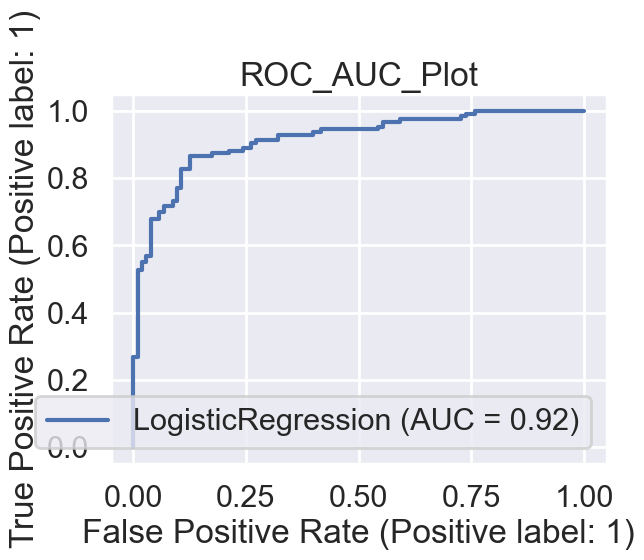

In [137]:
model(lr)

In [46]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred))

print("Classification Report",classification_report(ytest,ypred))

Confusion matrix of the model [[92 11]
 [28 99]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.89      0.83       103
           1       0.90      0.78      0.84       127

    accuracy                           0.83       230
   macro avg       0.83      0.84      0.83       230
weighted avg       0.84      0.83      0.83       230



I.   WITHOUT FEATURE SELECTION
II.  BALANCED
III. With HYPERPARAMETER TUNING(GridsearchCV)

In [47]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300],'solver':['newton-cg','lbfgs','liblinear']}

In [48]:
classifier_regressor=GridSearchCV(lr,param_grid=parameter,scoring='accuracy')

In [49]:
classifier_regressor.fit(xtrain,ytrain)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [50]:
print(classifier_regressor.best_params_)

{'C': 3, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [51]:
print(classifier_regressor.best_score_)

0.838562091503268


In [52]:
ypred = classifier_regressor.predict(xtest)

acc2=accuracy_score(ytest,ypred)
accuracies['LR2']=acc2*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_regressor.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 83.98950131233596 %
Testing accuracy score of the model is: 83.47826086956522 %


In [53]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred))

print("Classification Report",classification_report(ytest,ypred))

Confusion matrix of the model [[93 10]
 [28 99]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.90      0.83       103
           1       0.91      0.78      0.84       127

    accuracy                           0.83       230
   macro avg       0.84      0.84      0.83       230
weighted avg       0.85      0.83      0.84       230



# 2. KNearestNeighbors

I. WITHOUT FEATURE SELECTION II. BALANCED III. WITHOUT HYPERPARAMETER TUNING(GridsearchCV)

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(xtrain,ytrain)

ypred1 = knn.predict(xtest)

acc3=accuracy_score(ytest,ypred1)
accuracies['KNN']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, knn.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred1)*100,"%")

Training accuracy score of the model is: 87.4015748031496 %
Testing accuracy score of the model is: 83.47826086956522 %


In [55]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred1))

print("Classification Report",classification_report(ytest,ypred1))

Confusion matrix of the model [[ 91  12]
 [ 26 101]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.88      0.83       103
           1       0.89      0.80      0.84       127

    accuracy                           0.83       230
   macro avg       0.84      0.84      0.83       230
weighted avg       0.84      0.83      0.84       230



Accuracy :  83.48%
Cross Validation Score :  90.96%
ROC_AUC Score :  83.94%
Error Rate:  16.52%


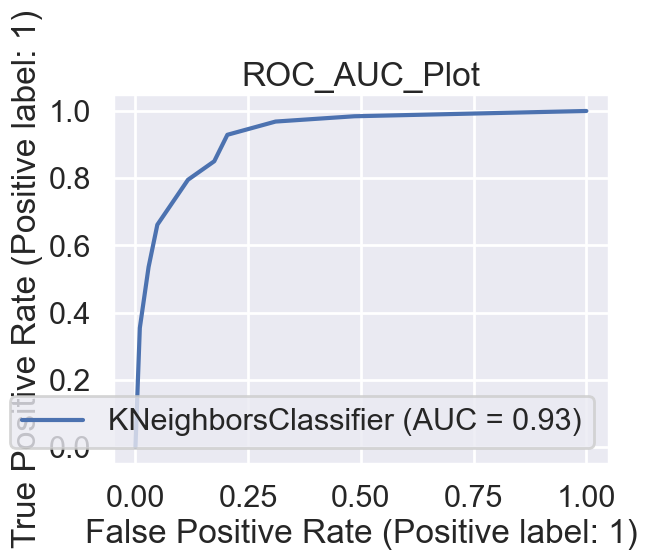

In [139]:
model(knn)

I. WITHOUT FEATURE SELECTION II. BALANCED III. With HYPERPARAMETER TUNING(GridsearchCV)

In [56]:
k_range = list(range(1, 31))
parameter = dict(n_neighbors=k_range)

In [57]:
classifier_knn=GridSearchCV(knn,param_grid=parameter, scoring='accuracy', return_train_score=False, verbose=1)

In [58]:
classifier_knn.fit(xtrain,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=8),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [59]:
print(classifier_knn.best_params_)

{'n_neighbors': 5}


In [60]:
print(classifier_knn.best_score_)

0.8529669762641898


In [61]:
ypred = classifier_knn.predict(xtest)

acc4=accuracy_score(ytest,ypred)
accuracies['KNN2']=acc4*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_knn.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 89.10761154855643 %
Testing accuracy score of the model is: 86.95652173913044 %


In [62]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred))

print("Classification Report",classification_report(ytest,ypred))

Confusion matrix of the model [[ 91  12]
 [ 18 109]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.88      0.86       103
           1       0.90      0.86      0.88       127

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



# SVM Classifier

I. WITHOUT FEATURE SELECTION II. BALANCED III. WITHOUT HYPERPARAMETER TUNING(GridsearchCV)

In [140]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(xtrain, ytrain)

ypred2 = svc.predict(xtest)

acc5=accuracy_score(ytest,ypred2)
accuracies['SVM']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, svc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred2)*100,"%")

Training accuracy score of the model is: 86.74540682414698 %
Testing accuracy score of the model is: 87.82608695652175 %


Accuracy :  87.83%
Cross Validation Score :  91.44%
ROC_AUC Score :  87.78%
Error Rate:  12.17%


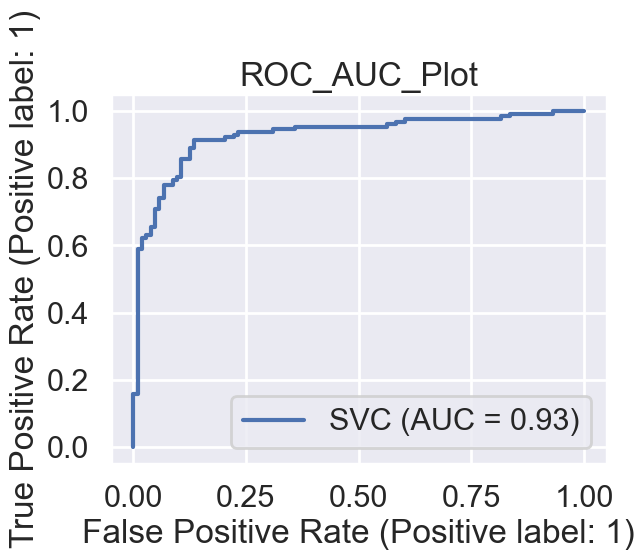

In [141]:
model(svc)

In [64]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred2))

print("Classification Report",classification_report(ytest,ypred2))

Confusion matrix of the model [[ 90  13]
 [ 15 112]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.87      0.87       103
           1       0.90      0.88      0.89       127

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



I. WITHOUT FEATURE SELECTION II. BALANCED III. WITH HYPERPARAMETER TUNING(GridsearchCV)

In [65]:
parameter2 ={'C':[1, 10, 100],'gamma':[0.001, 0.0001],'kernel': ['linear','rbf']}

In [66]:
classifier_svc=GridSearchCV(svc,param_grid=parameter2,scoring='accuracy',cv=10)

In [67]:
classifier_svc.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [68]:
print(classifier_svc.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [69]:
print(classifier_svc.best_score_)

0.8411825017088175


In [70]:
ypred = classifier_svc.predict(xtest)

acc6=accuracy_score(ytest,ypred)
accuracies['SVM2']=acc6*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_svc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 85.17060367454067 %
Testing accuracy score of the model is: 83.91304347826087 %


In [71]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred1))
print("Classification Report",classification_report(ytest,ypred1))

Confusion matrix of the model [[ 91  12]
 [ 26 101]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.88      0.83       103
           1       0.89      0.80      0.84       127

    accuracy                           0.83       230
   macro avg       0.84      0.84      0.83       230
weighted avg       0.84      0.83      0.84       230



# 4.Decision Tree Classifier

I. WITHOUT FEATURE SELECTION II. BALANCED III. WITHOUT HYPERPARAMETER TUNING(GridsearchCV)

In [142]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 1000,max_depth = 10,min_samples_leaf = 10 )
dtc.fit(xtrain, ytrain)

ypred3 = dtc.predict(xtest)

acc7=accuracy_score(ytest,ypred3)
accuracies['DT']=acc7*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, dtc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred3)*100,"%")

Training accuracy score of the model is: 87.92650918635171 %
Testing accuracy score of the model is: 80.43478260869566 %


Accuracy :  80.43%
Cross Validation Score :  88.45%
ROC_AUC Score :  80.63%
Error Rate:  19.57%


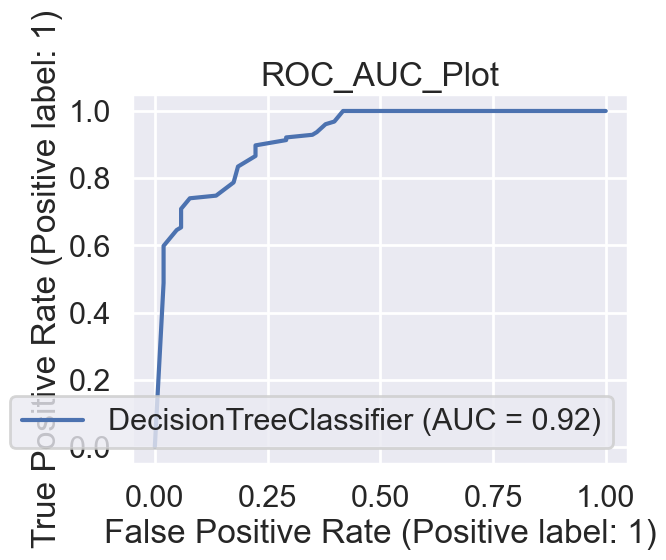

In [143]:
model(dtc)

In [73]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred3))
print("Classification Report",classification_report(ytest,ypred3))

Confusion matrix of the model [[ 85  18]
 [ 27 100]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.83      0.79       103
           1       0.85      0.79      0.82       127

    accuracy                           0.80       230
   macro avg       0.80      0.81      0.80       230
weighted avg       0.81      0.80      0.80       230



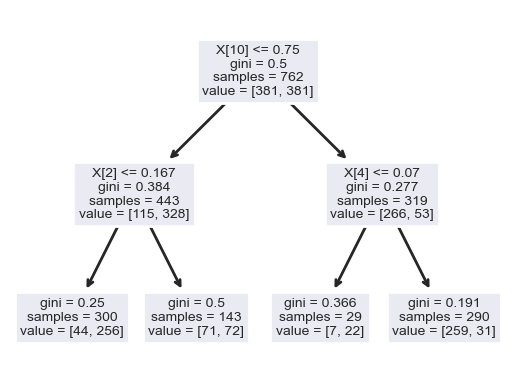

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

In [74]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(xtrain,ytrain)
from sklearn.tree import plot_tree
plot_tree(tree,fontsize=10)
plt.show()
plt.figure(figsize=(100,100))

I. WITHOUT FEATURE SELECTION II. BALANCED III. WITH HYPERPARAMETER TUNING(GridsearchCV)

In [75]:
parameter1 ={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':['auto', 'sqrt', 'log2']}

In [76]:
classifier_decisiontree=GridSearchCV(dtc,param_grid=parameter1,scoring='accuracy',cv=10)

In [77]:
classifier_decisiontree.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=10,
                                              random_state=1000),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [78]:
print(classifier_decisiontree.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'splitter': 'best'}


In [79]:
print(classifier_decisiontree.best_score_)

0.8504442925495559


In [80]:
ypred = classifier_decisiontree.predict(xtest)

acc8=accuracy_score(ytest,ypred)
accuracies['DT2']=acc8*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_decisiontree.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 86.61417322834646 %
Testing accuracy score of the model is: 72.60869565217392 %


# 5.Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(xtrain, ytrain)

ypred5 = rfc.predict(xtest)

acc9=accuracy_score(ytest,ypred5)
accuracies['RF']=acc9*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, rfc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred5)*100,"%")

Training accuracy score of the model is: 94.09448818897637 %
Testing accuracy score of the model is: 84.78260869565217 %


Accuracy :  83.48%
Cross Validation Score :  93.19%
ROC_AUC Score :  83.48%
Error Rate:  16.52%


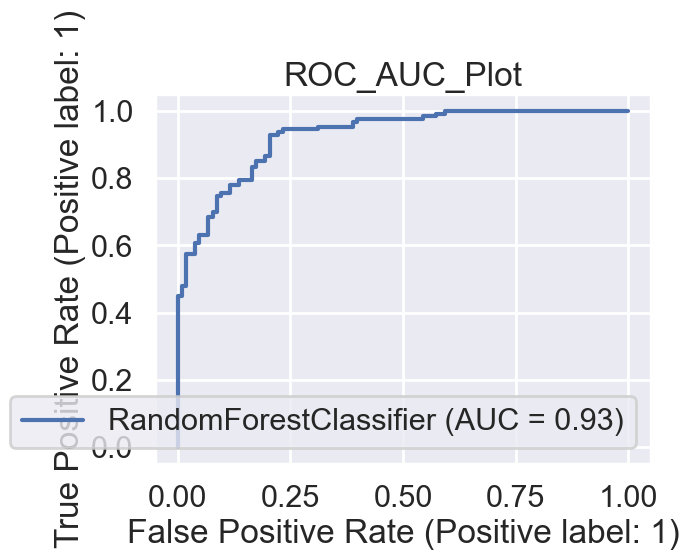

In [145]:
model(rfc)

In [82]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred5))

print("Classification Report",classification_report(ytest,ypred5))

Confusion matrix of the model [[ 87  16]
 [ 21 106]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.82       103
           1       0.87      0.83      0.85       127

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230



In [83]:
n_estimators=[100]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_leaf=[1,2]
bootstrap=[True,False]
min_samples_split=[2,5]

In [84]:
param_grid={'max_features':max_features,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap,'min_samples_split':min_samples_split}

In [85]:
classifier_randomsearch=GridSearchCV(rfc,param_grid,scoring='accuracy',cv=3)

In [86]:
classifier_randomsearch.fit(xtrain,ytrain)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=7, max_features='sqrt',
                                              min_samples_leaf=2,
                                              min_samples_split=4,
                                              n_estimators=180),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

In [87]:
print(classifier_randomsearch.best_params_)

{'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [88]:
print(classifier_randomsearch.best_score_)

0.8622047244094487


In [89]:
ypred5 =classifier_randomsearch.predict(xtest)

acc10=accuracy_score(ytest,ypred5)
accuracies['RF2']=acc10*100

print("Training accuracy score of the model is:",accuracy_score(ytrain,classifier_randomsearch.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred5)*100,"%")

Training accuracy score of the model is: 89.23884514435696 %
Testing accuracy score of the model is: 85.65217391304348 %


In [90]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred5))

print("Classification Report",classification_report(ytest,ypred5))

Confusion matrix of the model [[ 90  13]
 [ 20 107]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.87      0.85       103
           1       0.89      0.84      0.87       127

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



# 6. Gradient Boosting

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
gbc.fit(xtrain, ytrain)

ypred6 = gbc.predict(xtest)

acc11 = accuracy_score(ytest,ypred6)
accuracies['GB1']=acc11*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, gbc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred6)*100,"%")

Training accuracy score of the model is: 94.88188976377953 %
Testing accuracy score of the model is: 72.17391304347827 %


Accuracy :  72.61%
Cross Validation Score :  92.65%
ROC_AUC Score :  73.73%
Error Rate:  27.39%


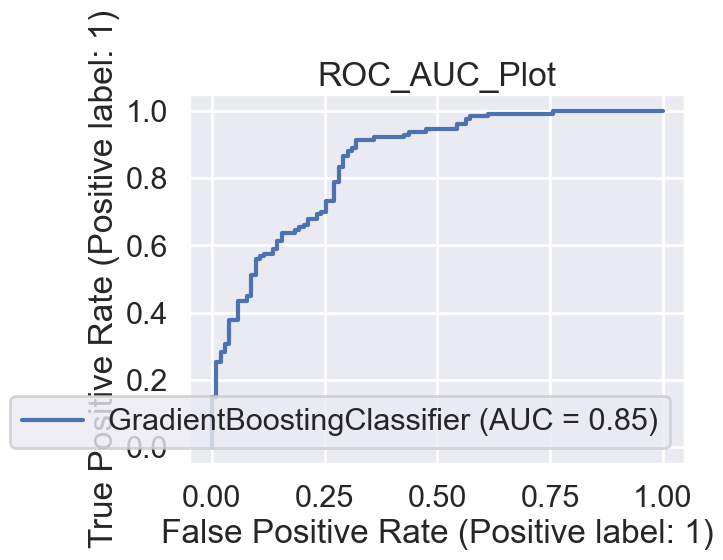

In [147]:
model(gbc)

In [92]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
parameters = {
    'learning_rate': [0.5],
    'subsample': [0.2, 0.3, 0.1],
    'n_estimators': [18,15],
    'max_depth': [ 1,2,3,4],
    'min_samples_split':[50,55,45,40]
}

In [93]:
classifier_Gb=GridSearchCV(gbc,param_grid=parameters,scoring='accuracy',cv=10)

In [94]:
classifier_Gb.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  n_estimators=180),
             param_grid={'learning_rate': [0.5], 'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [50, 55, 45, 40],
                         'n_estimators': [18, 15],
                         'subsample': [0.2, 0.3, 0.1]},
             scoring='accuracy')

In [95]:
print(classifier_Gb.best_score_)

0.8582365003417636


In [96]:
print(classifier_Gb.best_params_)

{'learning_rate': 0.5, 'max_depth': 1, 'min_samples_split': 40, 'n_estimators': 18, 'subsample': 0.3}


In [97]:
ypred6 = classifier_Gb.predict(xtest)

acc12 = accuracy_score(ytest,ypred6)
accuracies['GB2']=acc12*100

print("Training accuracy score of the model is:",accuracy_score(ytrain,classifier_Gb.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred6)*100,"%")

Training accuracy score of the model is: 86.8766404199475 %
Testing accuracy score of the model is: 80.0 %


In [98]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred6))
print("Classification Report",classification_report(ytest,ypred6))

Confusion matrix of the model [[ 70  33]
 [ 13 114]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.68      0.75       103
           1       0.78      0.90      0.83       127

    accuracy                           0.80       230
   macro avg       0.81      0.79      0.79       230
weighted avg       0.81      0.80      0.80       230



# Naive Bayes

In [148]:
from sklearn.naive_bayes import GaussianNB

classifier_NB = GaussianNB()
classifier_NB.fit(xtrain, ytrain)

ypred7 = classifier_NB.predict(xtest)

acc11 = accuracy_score(ytest,ypred7)
accuracies['NB']=acc11*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_NB.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred7)*100,"%")

Training accuracy score of the model is: 85.56430446194226 %
Testing accuracy score of the model is: 80.43478260869566 %


Accuracy :  80.43%
Cross Validation Score :  91.61%
ROC_AUC Score :  78.89%
Error Rate:  19.57%


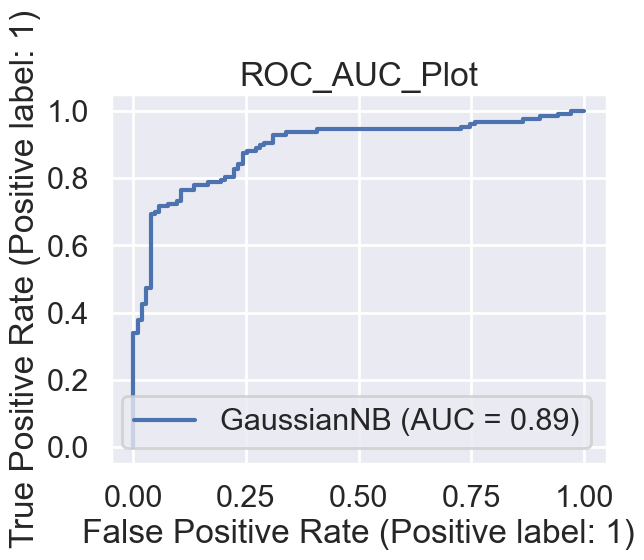

In [149]:
model(classifier_NB)

In [250]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred7))
print("Classification Report",classification_report(ytest,ypred7))

Confusion matrix of the model [[ 66  37]
 [  8 119]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.64      0.75       103
           1       0.76      0.94      0.84       127

    accuracy                           0.80       230
   macro avg       0.83      0.79      0.79       230
weighted avg       0.82      0.80      0.80       230



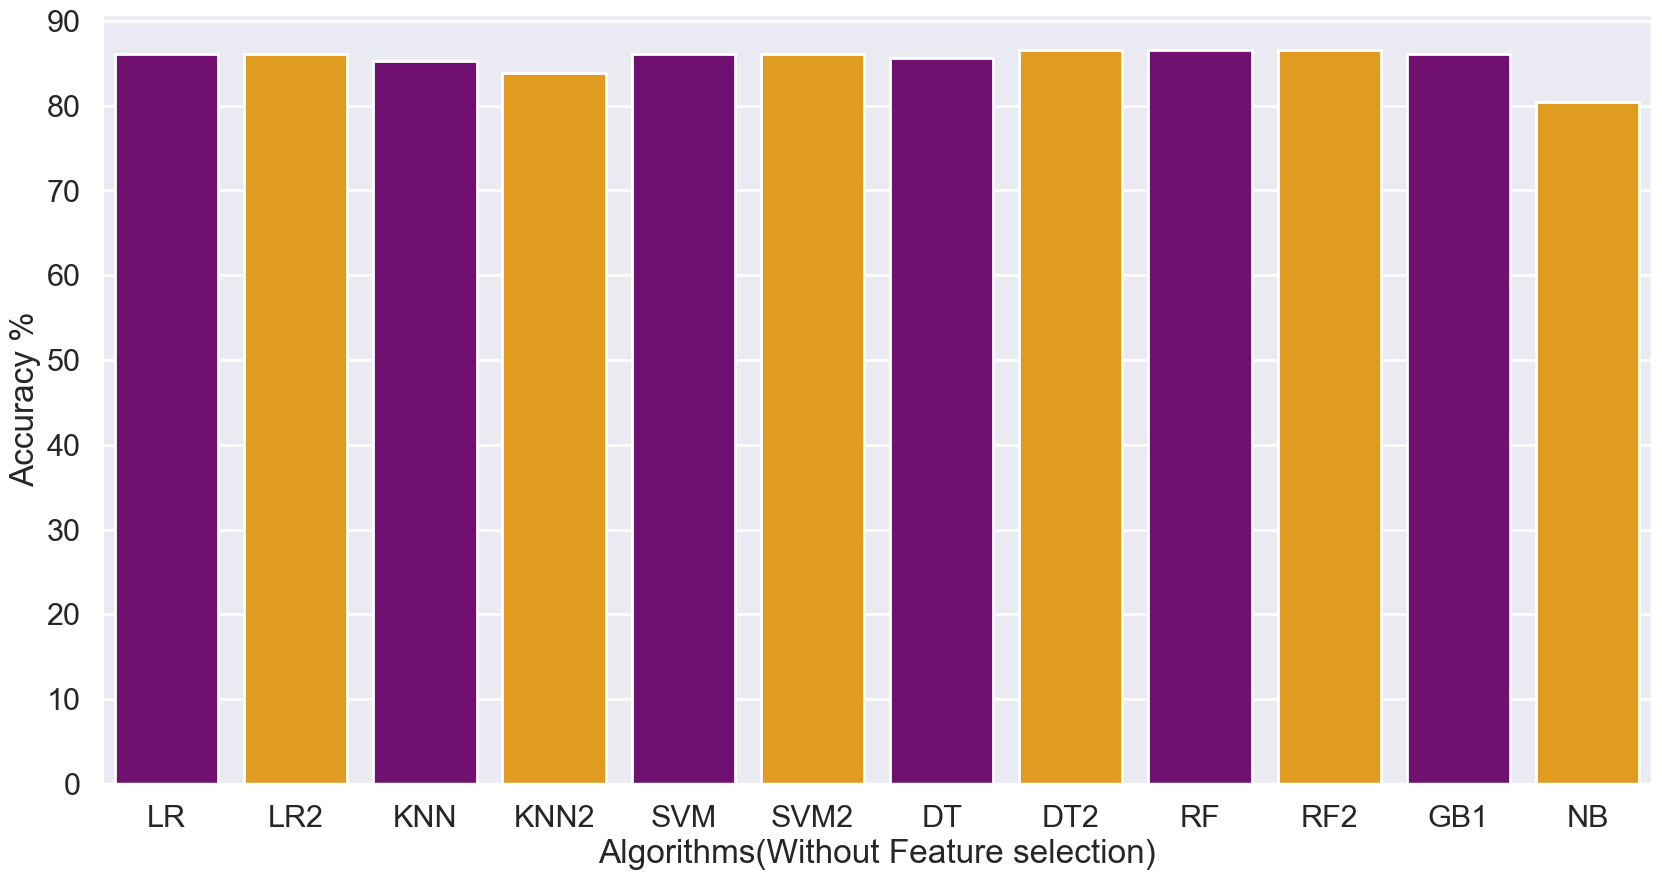

In [251]:
colors = ["purple", "orange"]

# sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms(Without Feature selection)")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

# Particle Swarm Optimization

In [99]:
from sklearn.svm import SVC
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization

In [150]:
X_new=dataset.drop(columns=['HeartDisease'])
y_new=dataset['HeartDisease']

In [151]:
X=X_new.to_numpy()
y=y_new.to_numpy()

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

In [153]:
class FeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
       # self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
       # accuracy = cross_val_score(SVC(), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        #score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return num_features
       # return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [154]:
problem = FeatureSelection(X_train, y_train)
task = Task(problem, max_iters=100)
algorithm = ParticleSwarmOptimization( population_size=10, limit=100,seed=1234)
best_features, best_fitness = algorithm.run(task)

In [155]:
dataset_features=dataset.drop(columns=['HeartDisease'])
best_features

array([0.97669977, 0.38019574, 0.92324623, 0.26169242, 0.31909706,
       0.11809123, 0.24176629, 0.31853393, 0.96407925, 0.2636498 ,
       0.44100612])

In [156]:
feature_names=dataset_features.columns.to_numpy()

In [157]:
selected_features = best_features > 0.5
print('Number of selected features:', selected_features.sum())

print('Selected features:', ', '.join(feature_names[selected_features].tolist()))

print(selected_features)

Number of selected features: 3
Selected features: Age, ChestPainType, ExerciseAngina
[ True False  True False False False False False  True False False]


In [158]:
df=dataset[['Age','ChestPainType','ExerciseAngina','HeartDisease']].copy()

In [159]:
from sklearn.model_selection import train_test_split, GridSearchCV
x = df.drop('HeartDisease', axis = 1)
Y = df['HeartDisease']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, Y, test_size = 0.25, stratify = Y, random_state = 0)

# Model creation after PSO Algorithm

In [160]:
def model(classifier):
    
    classifier.fit(Xtrain,Ytrain)
    prediction = classifier.predict(Xtest)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(Ytest,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,Xtrain,Ytrain,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(Ytest,prediction)))
    plot_roc_curve(classifier, Xtest,Ytest)
    plt.title('ROC_AUC_Plot')
    plt.show()

    
def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(Ytest,classifier.predict(Xtest))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap ='BrBG' ,fmt ='')
    
    # Classification Report
    print(classification_report(Ytest,classifier.predict(Xtest)))



# 1. Logistic Regression

In [161]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)

ypred = lr.predict(X_test)

acc=accuracy_score(y_test,ypred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")

Training accuracy score of the model is: 85.01362397820164 %
Testing accuracy score of the model is: 87.5 %


Accuracy :  77.39%
Cross Validation Score :  83.62%
ROC_AUC Score :  77.88%


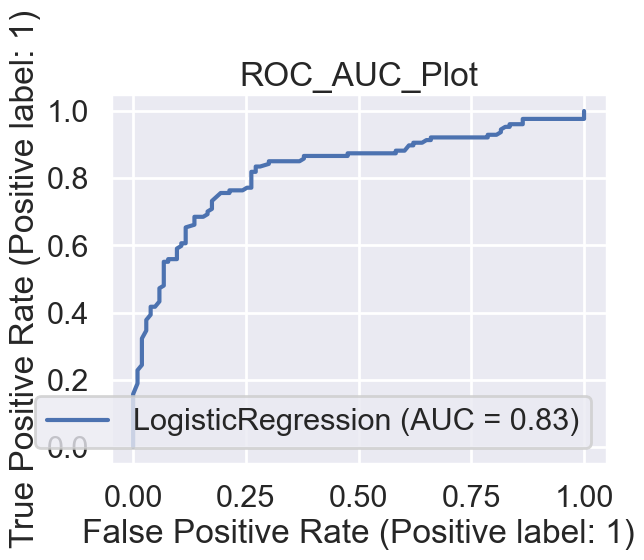

In [162]:
model(lr)

In [130]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred))

print("Classification Report",classification_report(y_test,ypred))

Confusion matrix of the model [[73  9]
 [14 88]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.89      0.86        82
           1       0.91      0.86      0.88       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [131]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300],'solver':['newton-cg','lbfgs','liblinear']}

In [132]:
classifier_regressor=GridSearchCV(lr,param_grid=parameter,scoring='accuracy')

In [133]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [134]:
print(classifier_regressor.best_params_)

{'C': 6, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [135]:
print(classifier_regressor.best_score_)

0.8487652595284689


In [136]:
ypred = classifier_regressor.predict(X_test)
acc2=accuracy_score(y_test,ypred)
accuracies['LR2']=acc2*100
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_regressor.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")

Training accuracy score of the model is: 84.60490463215258 %
Testing accuracy score of the model is: 87.5 %


In [137]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred))
print("Classification Report",classification_report(y_test,ypred))

Confusion matrix of the model [[73  9]
 [14 88]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.89      0.86        82
           1       0.91      0.86      0.88       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



# 2. KNearestNeighbors

In [163]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)

ypred1 = knn.predict(X_test)

acc3=accuracy_score(y_test,ypred1)
accuracies['KNN']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred1)*100,"%")

Training accuracy score of the model is: 70.02724795640327 %
Testing accuracy score of the model is: 66.84782608695652 %


In [139]:
k_range = list(range(15, 30))
parameter = dict(n_neighbors=k_range)

Accuracy :  70.87%
Cross Validation Score :  78.93%
ROC_AUC Score :  70.87%


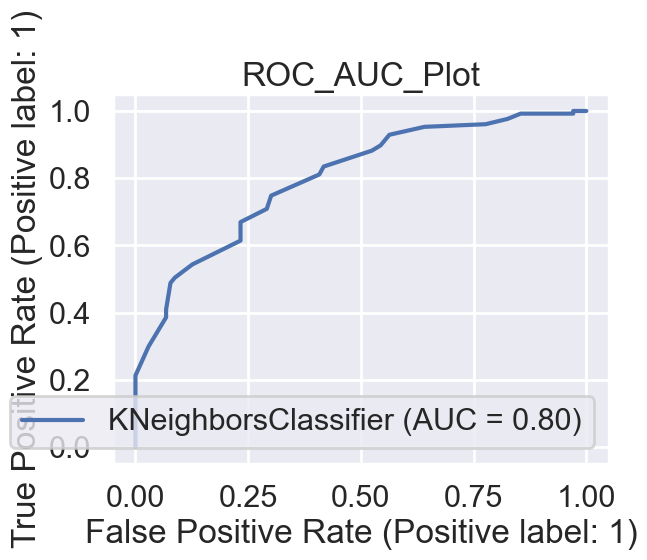

In [164]:
model(knn)

In [140]:
classifier_knn=GridSearchCV(knn,param_grid=parameter, scoring='accuracy', return_train_score=True, verbose=2)

classifier_knn.fit(X_train,y_train)

print(classifier_knn.best_params_)

print(classifier_knn.best_score_)

ypred = classifier_knn.predict(X_test)

acc4=accuracy_score(y_test,ypred)
accuracies['KNN2']=acc4*100
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_knn.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=17; total time=   0.0s
[CV] END .....................................n_

In [141]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred))

print("Classification Report",classification_report(y_test,ypred))

Confusion matrix of the model [[44 38]
 [26 76]]
Classification Report               precision    recall  f1-score   support

           0       0.63      0.54      0.58        82
           1       0.67      0.75      0.70       102

    accuracy                           0.65       184
   macro avg       0.65      0.64      0.64       184
weighted avg       0.65      0.65      0.65       184



# SVM

In [165]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(xtrain, ytrain)

ypred2 = svc.predict(xtest)

acc5=accuracy_score(ytest,ypred2)
accuracies['SVM']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, svc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred2)*100,"%")


Training accuracy score of the model is: 86.74540682414698 %
Testing accuracy score of the model is: 87.82608695652175 %


Accuracy :  63.48%
Cross Validation Score :  73.15%
ROC_AUC Score :  61.24%


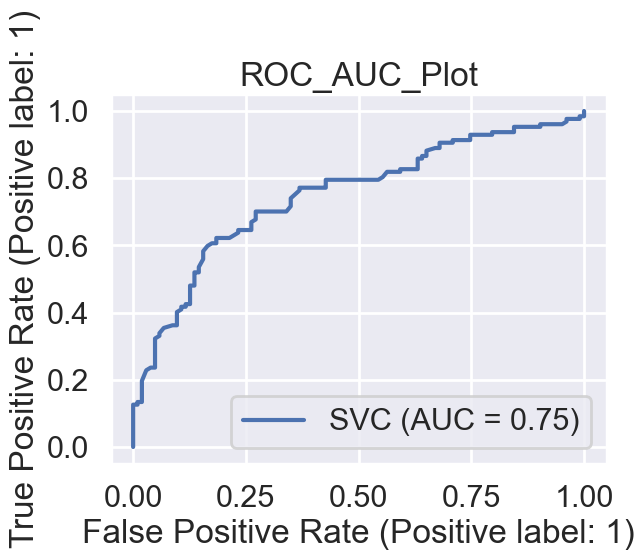

In [166]:
model(svc)

In [143]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred2))

print("Classification Report",classification_report(ytest,ypred2))

Confusion matrix of the model [[ 90  13]
 [ 15 112]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.87      0.87       103
           1       0.90      0.88      0.89       127

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



In [145]:
parameter2 ={'C':[1,5],'gamma':[0.1, 0.01],'kernel': ['linear','rbf']}
classifier_svc=GridSearchCV(svc,param_grid=parameter2,scoring='accuracy',cv=2)
classifier_svc.fit(X_train,y_train)
print(classifier_svc.best_params_)

{'C': 5, 'gamma': 0.1, 'kernel': 'linear'}


In [146]:
print(classifier_svc.best_score_)

0.8460490463215259


In [147]:
ypred = classifier_svc.predict(X_test)

In [148]:
acc6=accuracy_score(y_test,ypred)
accuracies['SVM2']=acc6*100
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_svc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")

Training accuracy score of the model is: 86.37602179836512 %
Testing accuracy score of the model is: 86.95652173913044 %


In [149]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred))
print("Classification Report",classification_report(y_test,ypred))

Confusion matrix of the model [[70 12]
 [12 90]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.88      0.88      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



# DECISION TREE

In [167]:
from sklearn.tree import DecisionTreeClassifier

In [168]:
dtc = DecisionTreeClassifier(random_state = 1000,max_depth = 10,min_samples_leaf = 10 )
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=1000)

In [169]:
ypred3 = dtc.predict(X_test)

In [170]:
acc7=accuracy_score(y_test,ypred3)
accuracies['DT']=acc7*100

Accuracy :  74.35%
Cross Validation Score :  83.21%
ROC_AUC Score :  74.11%


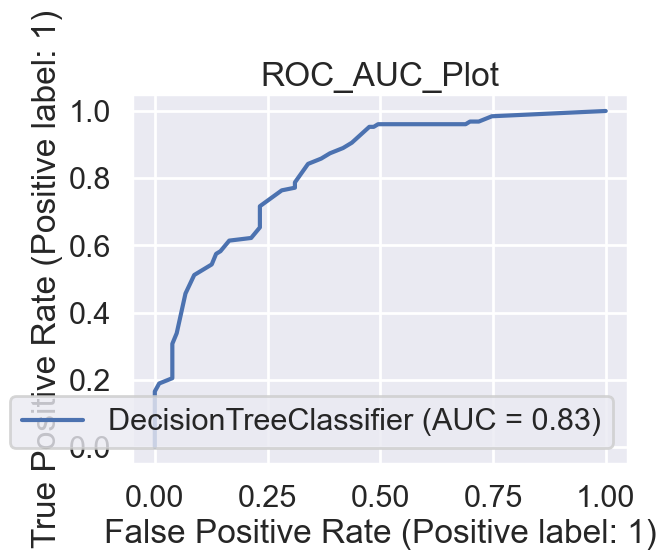

In [171]:
model(dtc)

In [154]:
print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred3)*100,"%")

Training accuracy score of the model is: 88.0108991825613 %
Testing accuracy score of the model is: 83.69565217391305 %


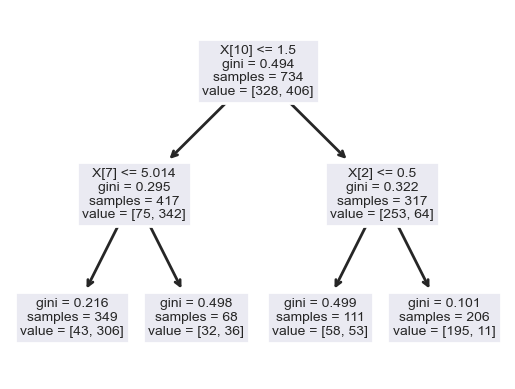

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

In [155]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(X_train,y_train)
from sklearn.tree import plot_tree
plot_tree(tree,fontsize=10)
plt.show()
plt.figure(figsize=(100,100))

In [156]:
parameter1 ={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':['auto', 'sqrt', 'log2']}

In [157]:
classifier_decisiontree=GridSearchCV(dtc,param_grid=parameter1,scoring='accuracy',cv=10)

classifier_decisiontree.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=10,
                                              random_state=1000),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [158]:
ypred = classifier_decisiontree.predict(X_test)

In [159]:
acc8=accuracy_score(y_test,ypred)
accuracies['DT2']=acc8*100
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_decisiontree.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")

Training accuracy score of the model is: 85.83106267029973 %
Testing accuracy score of the model is: 86.41304347826086 %


# Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=180)

In [174]:

ypred5 = rfc.predict(X_test)

acc9=accuracy_score(y_test,ypred5)
accuracies['RF']=acc9*100

Accuracy :  74.78%
Cross Validation Score :  84.31%
ROC_AUC Score :  74.51%


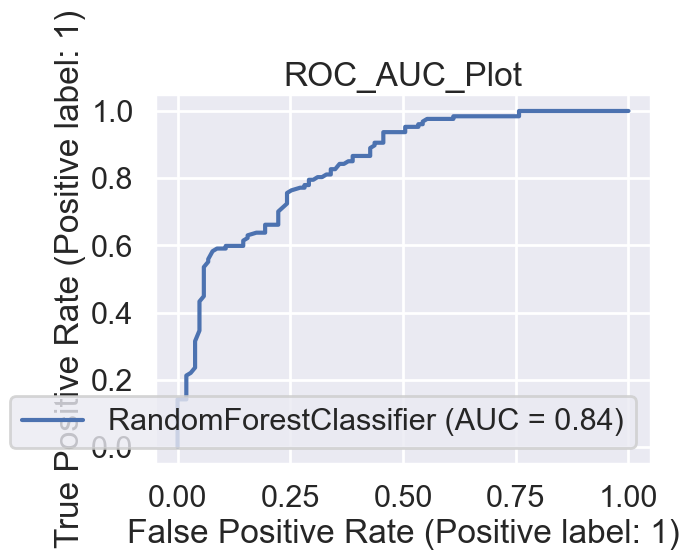

In [175]:
model(rfc)

In [163]:
print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred5)*100,"%")

Training accuracy score of the model is: 93.73297002724796 %
Testing accuracy score of the model is: 86.95652173913044 %


In [164]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred5))

print("Classification Report",classification_report(y_test,ypred5))

Confusion matrix of the model [[69 13]
 [11 91]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.84      0.85        82
           1       0.88      0.89      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [165]:
n_estimators=[100]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_leaf=[1,2]
bootstrap=[True,False]
min_samples_split=[2,5]

In [166]:
param_grid={'max_features':max_features,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap,'min_samples_split':min_samples_split}

In [167]:
classifier_randomsearch=GridSearchCV(rfc,param_grid,scoring='accuracy',cv=10)
classifier_randomsearch.fit(X_train,y_train)
print(classifier_randomsearch.best_params_)
print(classifier_randomsearch.best_score_)

{'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8651795631247687


In [168]:
ypred5 =classifier_randomsearch.predict(X_test)
acc10=accuracy_score(y_test,ypred5)
accuracies['RF2']=acc10*100

In [169]:
acc10=accuracy_score(y_test,ypred5)
accuracies['RF2']=acc10*100
print("Training accuracy score of the model is:",accuracy_score(y_train,classifier_randomsearch.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred5)*100,"%")

Training accuracy score of the model is: 88.96457765667574 %
Testing accuracy score of the model is: 88.04347826086956 %


In [170]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred5))
print("Classification Report",classification_report(y_test,ypred5))

Confusion matrix of the model [[71 11]
 [11 91]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



# Gradient Boosting

In [176]:
from sklearn.ensemble import GradientBoostingClassifier

In [177]:
gbc = GradientBoostingClassifier()

In [178]:
gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)

In [179]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=180)

In [180]:
ypred6 = gbc.predict(X_test)
acc11 = accuracy_score(y_test,ypred6)
accuracies['GB1']=acc11*100

Accuracy :  74.78%
Cross Validation Score :  85.27%
ROC_AUC Score :  74.32%


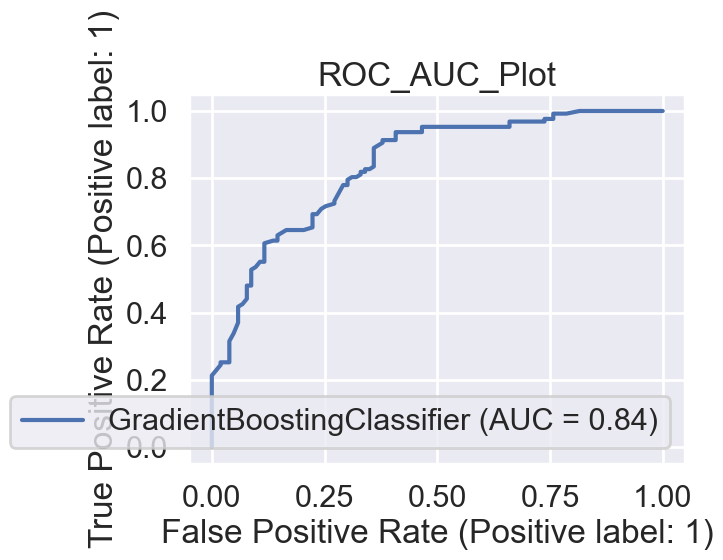

In [181]:
model(gbc)

In [117]:
print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred6)*100,"%")

Training accuracy score of the model is: 94.82288828337875 %
Testing accuracy score of the model is: 89.13043478260869 %


In [118]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

parameters = {
    'learning_rate': [0.5],
    'subsample': [0.2, 0.3, 0.1],
    'n_estimators': [18,15],
    'max_depth': [ 1,2,3,4],
    'min_samples_split':[50,55,45,40]
}


In [119]:
classifier_Gb=GridSearchCV(gbc,param_grid=parameters,scoring='accuracy',cv=3)

In [120]:
classifier_Gb.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  n_estimators=180),
             param_grid={'learning_rate': [0.5], 'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [50, 55, 45, 40],
                         'n_estimators': [18, 15],
                         'subsample': [0.2, 0.3, 0.1]},
             scoring='accuracy')

In [121]:
print(classifier_Gb.best_score_)
print(classifier_Gb.best_params_)

0.8542433366789338
{'learning_rate': 0.5, 'max_depth': 1, 'min_samples_split': 45, 'n_estimators': 18, 'subsample': 0.3}


In [122]:
ypred6 = classifier_Gb.predict(X_test)

In [123]:
acc12 = accuracy_score(y_test,ypred6)
accuracies['GB2']=acc12*100

In [124]:
print("Training accuracy score of the model is:",accuracy_score(y_train,classifier_Gb.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred6)*100,"%")

Training accuracy score of the model is: 86.64850136239782 %
Testing accuracy score of the model is: 89.13043478260869 %


# Naive Bayes


In [182]:
from sklearn.naive_bayes import GaussianNB

classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

ypred7 = classifier_NB.predict(X_test)

acc11 = accuracy_score(y_test,ypred7)
accuracies['NB']=acc11*100

Accuracy :  76.52%
Cross Validation Score :  83.37%
ROC_AUC Score :  77.09%


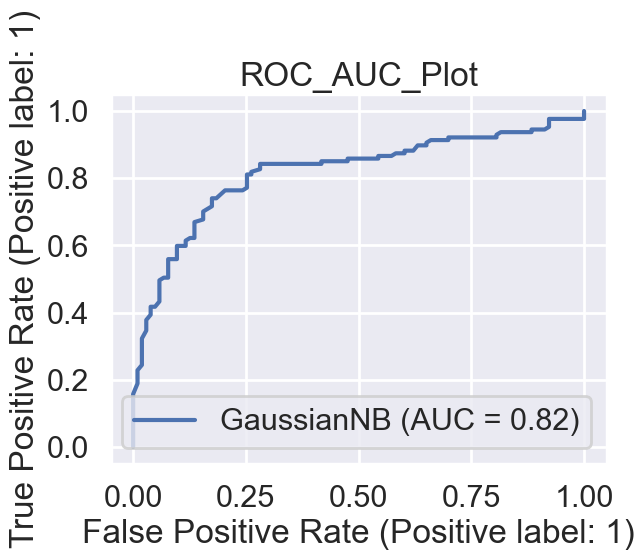

In [183]:
model(classifier_NB)

In [247]:
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_NB.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred7)*100,"%")

Training accuracy score of the model is: 85.42234332425068 %
Testing accuracy score of the model is: 85.32608695652173 %


In [182]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred7))
print("Classification Report",classification_report(y_test,ypred7))

Confusion matrix of the model [[70 12]
 [ 8 94]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.85      0.88        82
           1       0.89      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



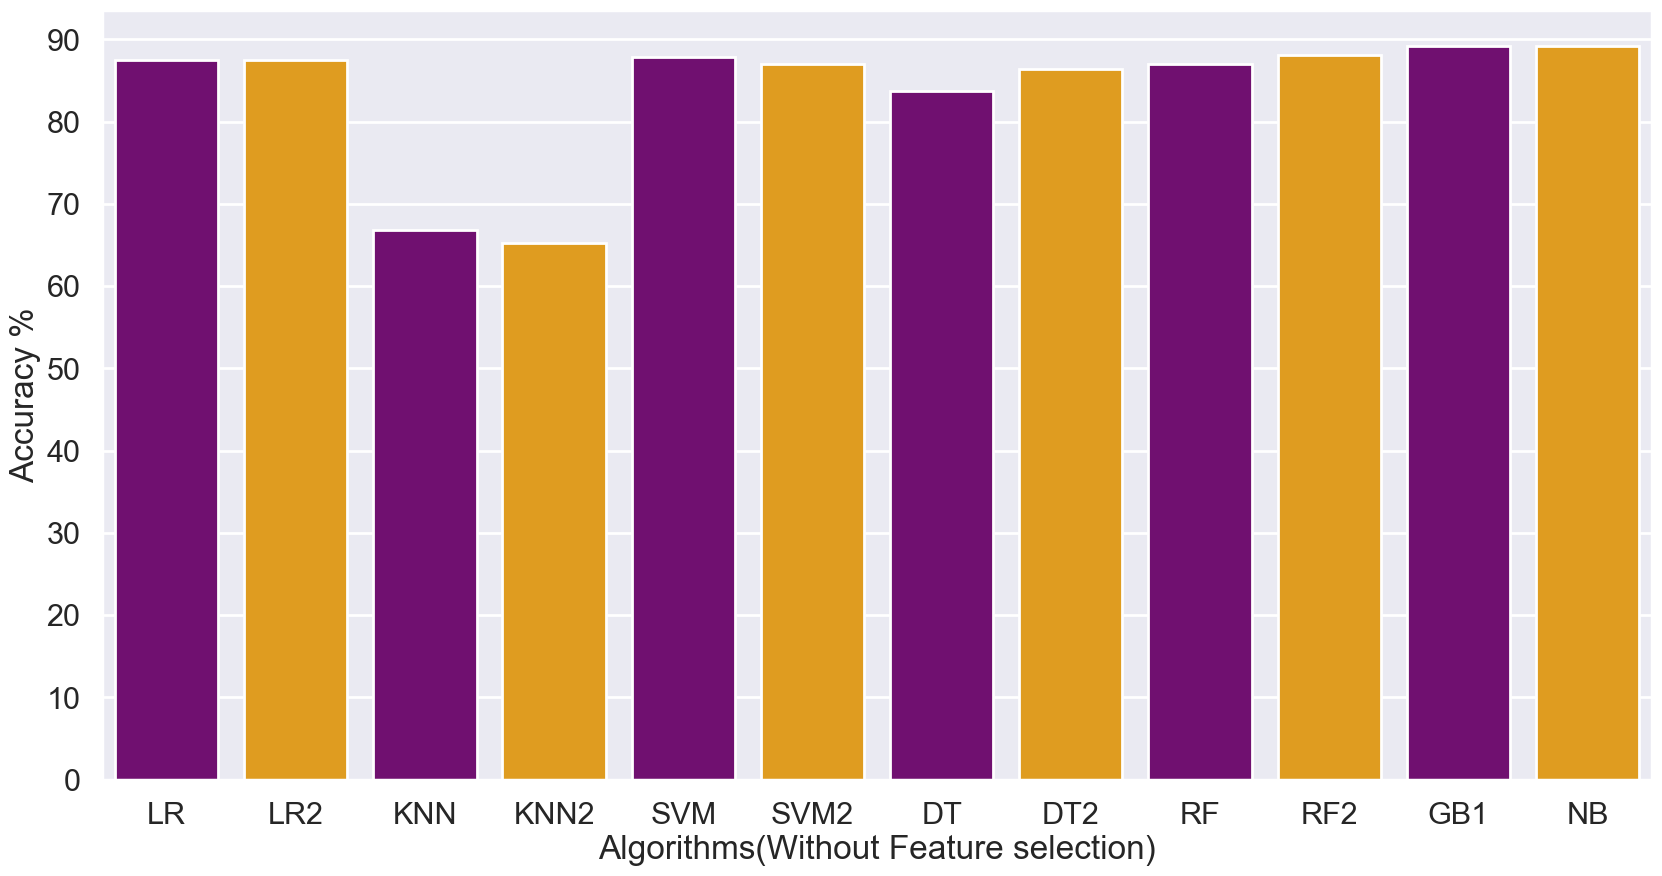

In [183]:
colors = ["purple", "orange"]
# sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms(Without Feature selection)")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

# Model creation after Forward Feature Selection

In [186]:
data=dataset[['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope','HeartDisease']].copy()
data_set=dataset[['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope','HeartDisease']].copy()

In [187]:
from sklearn.model_selection import train_test_split, GridSearchCV
xxx = data_set.drop('HeartDisease', axis = 1)
YYY = data_set['HeartDisease']
XXXtrain, XXXtest, YYYtrain, YYYtest = train_test_split(xxx, YYY, test_size = 0.25, stratify = YYY, random_state = 0)

In [188]:
xx = data.drop('HeartDisease', axis = 1)
YY = data['HeartDisease']
XXtrain, XXtest, YYtrain, YYtest = train_test_split(xx, YY, test_size = 0.25, stratify = YY, random_state = 0)

In [189]:
def model(classifier):
    
    classifier.fit(XXtrain,YYtrain)
    prediction = classifier.predict(XXtest)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(YYtest,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,XXtrain,YYtrain,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(YYtest,prediction)))
    plot_roc_curve(classifier, XXtest,YYtest)
    plt.title('ROC_AUC_Plot')
    plt.show()

    
def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(YYtest,classifier.predict(XXtest))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap ='BrBG' ,fmt ='')
    
    # Classification Report
    print(classification_report(YYtest,classifier.predict(XXtest)))

# 1. Logistic Regression

In [190]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(XXtrain,YYtrain)

ypred = lr.predict(XXtest)

acc=accuracy_score(YYtest,ypred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, lr.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

Training accuracy score of the model is: 84.59302325581395 %
Testing accuracy score of the model is: 86.08695652173914 %


Accuracy :  86.09%
Cross Validation Score :  90.08%
ROC_AUC Score :  86.30%


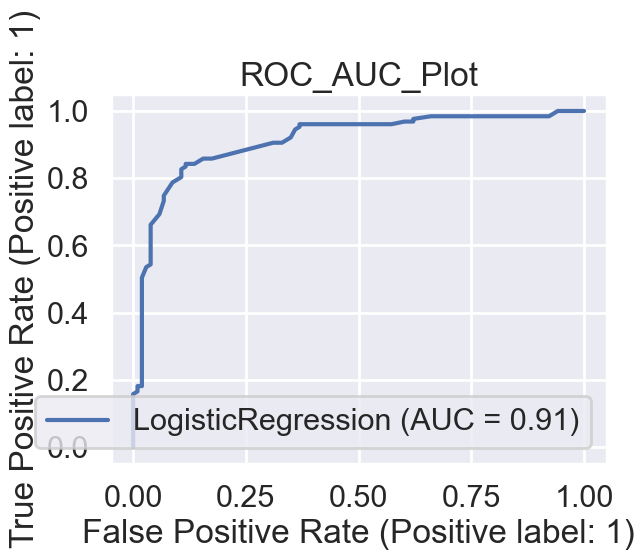

In [191]:
model(lr)

In [201]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred))
print("Classification Report",classification_report(YYtest,ypred))

Confusion matrix of the model [[ 91  12]
 [ 20 107]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       103
           1       0.90      0.84      0.87       127

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



In [202]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300],'solver':['newton-cg','lbfgs','liblinear']}

In [203]:
classifier_regressor=GridSearchCV(lr,param_grid=parameter,scoring='accuracy')

In [204]:
classifier_regressor.fit(XXtrain,YYtrain)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [205]:
print(classifier_regressor.best_params_)

{'C': 2, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [206]:
print(classifier_regressor.best_score_)

0.8416269967206178


In [207]:
ypred = classifier_regressor.predict(XXtest)
acc2=accuracy_score(YYtest,ypred)
accuracies['LR2']=acc2*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_regressor.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

Training accuracy score of the model is: 84.59302325581395 %
Testing accuracy score of the model is: 86.08695652173914 %


In [208]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred))
print("Classification Report",classification_report(YYtest,ypred))

Confusion matrix of the model [[ 91  12]
 [ 20 107]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       103
           1       0.90      0.84      0.87       127

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



# 2. KNearestNeighbors

In [192]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)

knn.fit(XXtrain,YYtrain)

ypred1 = knn.predict(XXtest)

acc3=accuracy_score(YYtest,ypred1)
accuracies['KNN']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(YYtrain, knn.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred1)*100,"%")

Training accuracy score of the model is: 85.90116279069767 %
Testing accuracy score of the model is: 85.21739130434783 %


Accuracy :  85.22%
Cross Validation Score :  90.74%
ROC_AUC Score :  85.05%


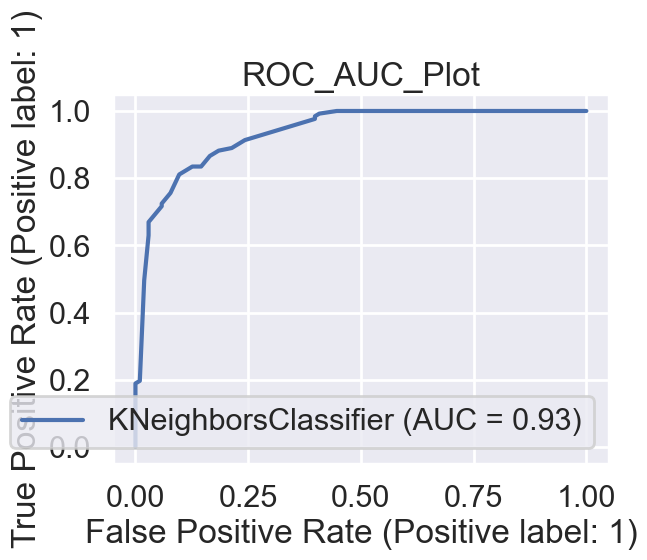

In [193]:
model(knn)

In [210]:
k_range = list(range(15, 30))
parameter = dict(n_neighbors=k_range)

In [211]:
classifier_knn=GridSearchCV(knn,param_grid=parameter, scoring='accuracy', return_train_score=True, verbose=2)

classifier_knn.fit(XXtrain,YYtrain)

print(classifier_knn.best_params_)

print(classifier_knn.best_score_)

ypred = classifier_knn.predict(XXtest)

acc4=accuracy_score(YYtest,ypred)
accuracies['KNN2']=acc4*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_knn.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=17; total time=   0.0s
[CV] END .....................................n_

In [212]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred))
print("Classification Report",classification_report(YYtest,ypred))

Confusion matrix of the model [[ 86  17]
 [ 20 107]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.83      0.82       103
           1       0.86      0.84      0.85       127

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230



# 3. SVM

In [194]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(XXtrain, YYtrain)

ypred2 = svc.predict(XXtest)

acc5=accuracy_score(YYtest,ypred2)
accuracies['SVM']=acc5*100

Accuracy :  86.09%
Cross Validation Score :  90.20%
ROC_AUC Score :  85.84%


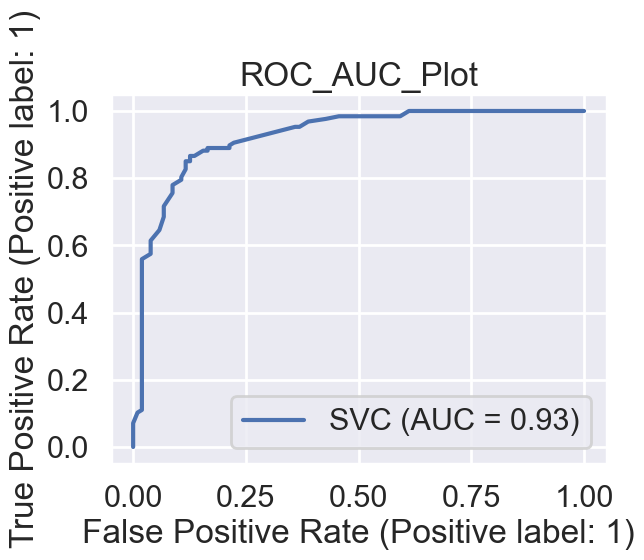

In [195]:
model(svc)

In [214]:
print("Training accuracy score of the model is:",accuracy_score(YYtrain, svc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred2)*100,"%")

Training accuracy score of the model is: 86.04651162790698 %
Testing accuracy score of the model is: 86.08695652173914 %


In [215]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred2))
print("Classification Report",classification_report(YYtest,ypred2))


Confusion matrix of the model [[ 86  17]
 [ 15 112]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       103
           1       0.87      0.88      0.88       127

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



In [216]:
parameter2 ={'C':[1, 10, 100],'gamma':[0.001, 0.0001],'kernel': ['linear','rbf']}
classifier_svc=GridSearchCV(svc,param_grid=parameter2,scoring='accuracy',cv=3)

In [217]:
classifier_svc.fit(XXtrain,YYtrain)

print(classifier_svc.best_params_)
print(classifier_svc.best_score_)

ypred = classifier_svc.predict(XXtest)

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.8560724004809823


In [218]:
acc6=accuracy_score(YYtest,ypred)
accuracies['SVM2']=acc6*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_svc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

Training accuracy score of the model is: 85.46511627906976 %
Testing accuracy score of the model is: 86.08695652173914 %


In [219]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred1))
print("Classification Report",classification_report(YYtest,ypred1))

Confusion matrix of the model [[ 86  17]
 [ 17 110]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.87      0.87      0.87       127

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



# 4. DECISION TREE

In [196]:
from sklearn.tree import DecisionTreeClassifier

In [197]:
dtc = DecisionTreeClassifier(random_state = 1000,max_depth = 10,min_samples_leaf = 10 )
dtc.fit(XXtrain, YYtrain)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=1000)

In [198]:
ypred3 = dtc.predict(XXtest)

In [199]:
acc7=accuracy_score(YYtest,ypred3)
accuracies['DT']=acc7*100

Accuracy :  85.65%
Cross Validation Score :  89.86%
ROC_AUC Score :  85.63%


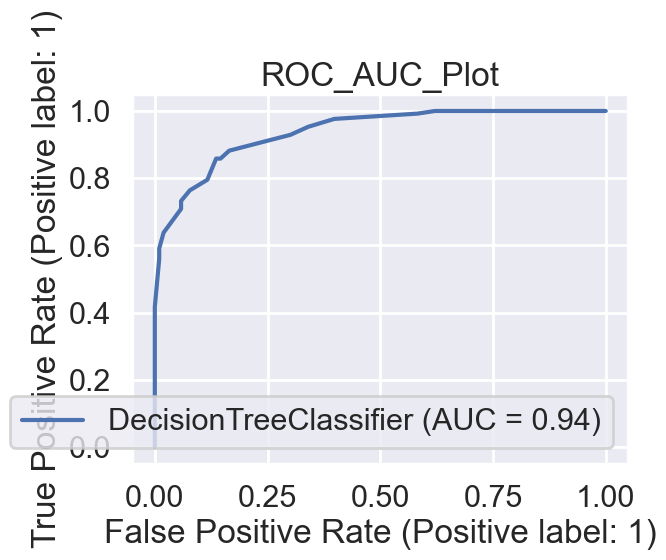

In [200]:
model(dtc)

In [224]:
print("Training accuracy score of the model is:",accuracy_score(YYtrain, dtc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred3)*100,"%")

Training accuracy score of the model is: 86.33720930232558 %
Testing accuracy score of the model is: 85.65217391304348 %


In [225]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred3))
print("Classification Report",classification_report(YYtest,ypred3))

Confusion matrix of the model [[ 88  15]
 [ 18 109]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       103
           1       0.88      0.86      0.87       127

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



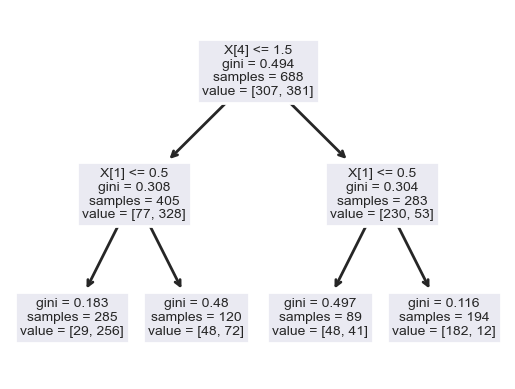

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

In [226]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(XXtrain,YYtrain)
from sklearn.tree import plot_tree
plot_tree(tree,fontsize=10)
plt.show()
plt.figure(figsize=(100,100))

In [227]:
parameter1 ={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':['auto', 'sqrt', 'log2']}

In [228]:
classifier_decisiontree=GridSearchCV(dtc,param_grid=parameter1,scoring='accuracy',cv=10)

In [229]:
classifier_decisiontree.fit(XXtrain,YYtrain)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=10,
                                              random_state=1000),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [230]:
ypred = classifier_decisiontree.predict(XXtest)

acc8=accuracy_score(YYtest,ypred)
accuracies['DT2']=acc8*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_decisiontree.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

Training accuracy score of the model is: 86.04651162790698 %
Testing accuracy score of the model is: 86.52173913043478 %


In [201]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(XXtrain, YYtrain)

ypred5 = rfc.predict(XXtest)

acc9=accuracy_score(YYtest,ypred5)
accuracies['RF']=acc9*100

print("Training accuracy score of the model is:",accuracy_score(YYtrain, rfc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred5)*100,"%")

print("Confusion matrix of the model",confusion_matrix(YYtest,ypred5))

print("Classification Report",classification_report(YYtest,ypred5))


Training accuracy score of the model is: 86.9186046511628 %
Testing accuracy score of the model is: 86.95652173913044 %
Confusion matrix of the model [[ 90  13]
 [ 17 110]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.89      0.87      0.88       127

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



Accuracy :  86.96%
Cross Validation Score :  90.30%
ROC_AUC Score :  87.00%


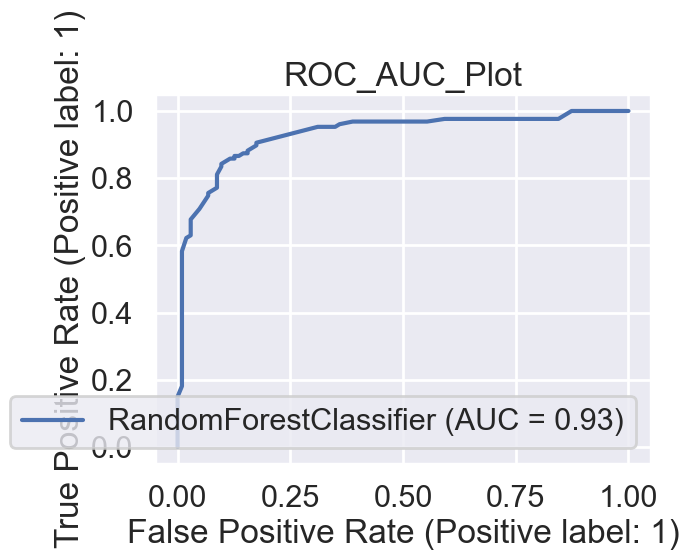

In [202]:
model(rfc)

In [232]:
n_estimators=[100]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_leaf=[1,2]
bootstrap=[True,False]
min_samples_split=[2,5]

In [233]:
param_grid={'max_features':max_features,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap,'min_samples_split':min_samples_split}

In [234]:
classifier_randomsearch=GridSearchCV(rfc,param_grid,scoring='accuracy',cv=3)

In [235]:
classifier_randomsearch.fit(XXtrain,YYtrain)
print(classifier_randomsearch.best_params_)
print(classifier_randomsearch.best_score_)
ypred5 =classifier_randomsearch.predict(XXtest)
acc10=accuracy_score(YYtest,ypred5)
accuracies['RF2']=acc10*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain,classifier_randomsearch.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred5)*100,"%")

{'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
0.861863173216885
Training accuracy score of the model is: 86.62790697674419 %
Testing accuracy score of the model is: 86.52173913043478 %


In [236]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred5))
print("Classification Report",classification_report(YYtest,ypred5))

Confusion matrix of the model [[ 88  15]
 [ 16 111]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       103
           1       0.88      0.87      0.88       127

    accuracy                           0.87       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.87      0.87      0.87       230



# 6. Gradient Boosting

In [203]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
gbc.fit(XXtrain, YYtrain)

ypred6 = gbc.predict(XXtest)

acc11 = accuracy_score(YYtest,ypred6)
accuracies['GB1']=acc11*100

Accuracy :  86.09%
Cross Validation Score :  90.34%
ROC_AUC Score :  86.12%


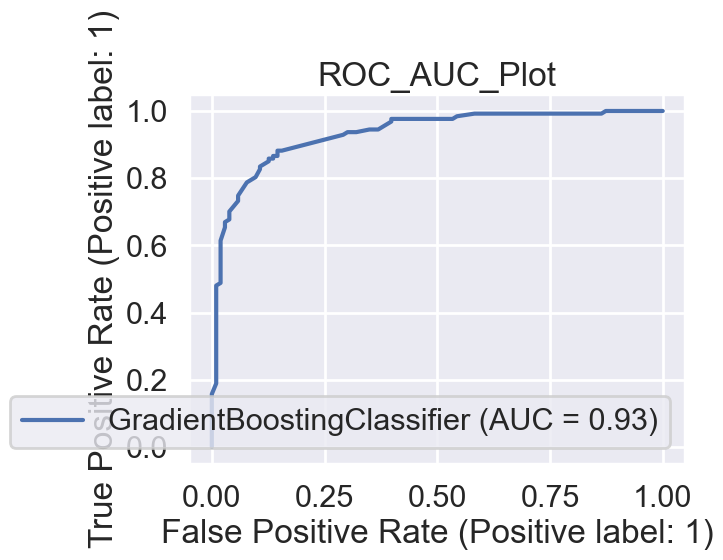

In [204]:
model(gbc)

In [131]:
print("Training accuracy score of the model is:",accuracy_score(YYtrain, gbc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred6)*100,"%")

Training accuracy score of the model is: 87.20930232558139 %
Testing accuracy score of the model is: 86.08695652173914 %


In [132]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

parameters = {
    'learning_rate': [0.5],
    'subsample': [0.2, 0.3, 0.1],
    'n_estimators': [18,15],
    'max_depth': [ 1,2,3,4],
    'min_samples_split':[50,55,45,40]
}

In [133]:
classifier_Gb=GridSearchCV(gbc,param_grid=parameters,scoring='accuracy',cv=3)
classifier_Gb.fit(XXtrain,YYtrain)
print(classifier_Gb.best_score_)
print(classifier_Gb.best_params_)

0.8618821593570027
{'learning_rate': 0.5, 'max_depth': 4, 'min_samples_split': 55, 'n_estimators': 18, 'subsample': 0.2}


In [134]:
ypred6 = classifier_Gb.predict(XXtest)
acc12 = accuracy_score(YYtest,ypred6)
accuracies['GB2']=acc12*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain,classifier_Gb.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred6)*100,"%")

Training accuracy score of the model is: 85.75581395348837 %
Testing accuracy score of the model is: 85.65217391304348 %


# 7. Naive Bayes

In [205]:
from sklearn.naive_bayes import GaussianNB

classifier_NB = GaussianNB()
classifier_NB.fit(XXtrain, YYtrain)

ypred7 = classifier_NB.predict(XXtest)

acc11 = accuracy_score(YYtest,ypred7)
accuracies['NB']=acc11*100

print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_NB.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred7)*100,"%")

Training accuracy score of the model is: 83.28488372093024 %
Testing accuracy score of the model is: 84.78260869565217 %


Accuracy :  84.78%
Cross Validation Score :  89.70%
ROC_AUC Score :  84.84%


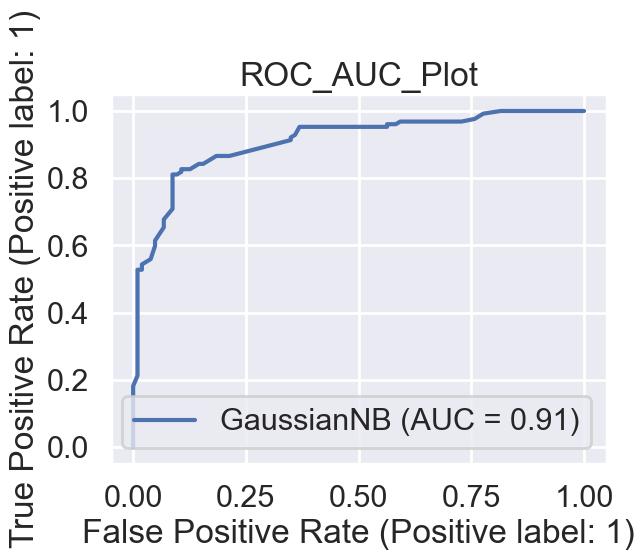

In [206]:
model(classifier_NB)

In [242]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred7))
print("Classification Report",classification_report(ytest,ypred7))

Confusion matrix of the model [[ 89  14]
 [ 18 109]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.85       103
           1       0.89      0.86      0.87       127

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



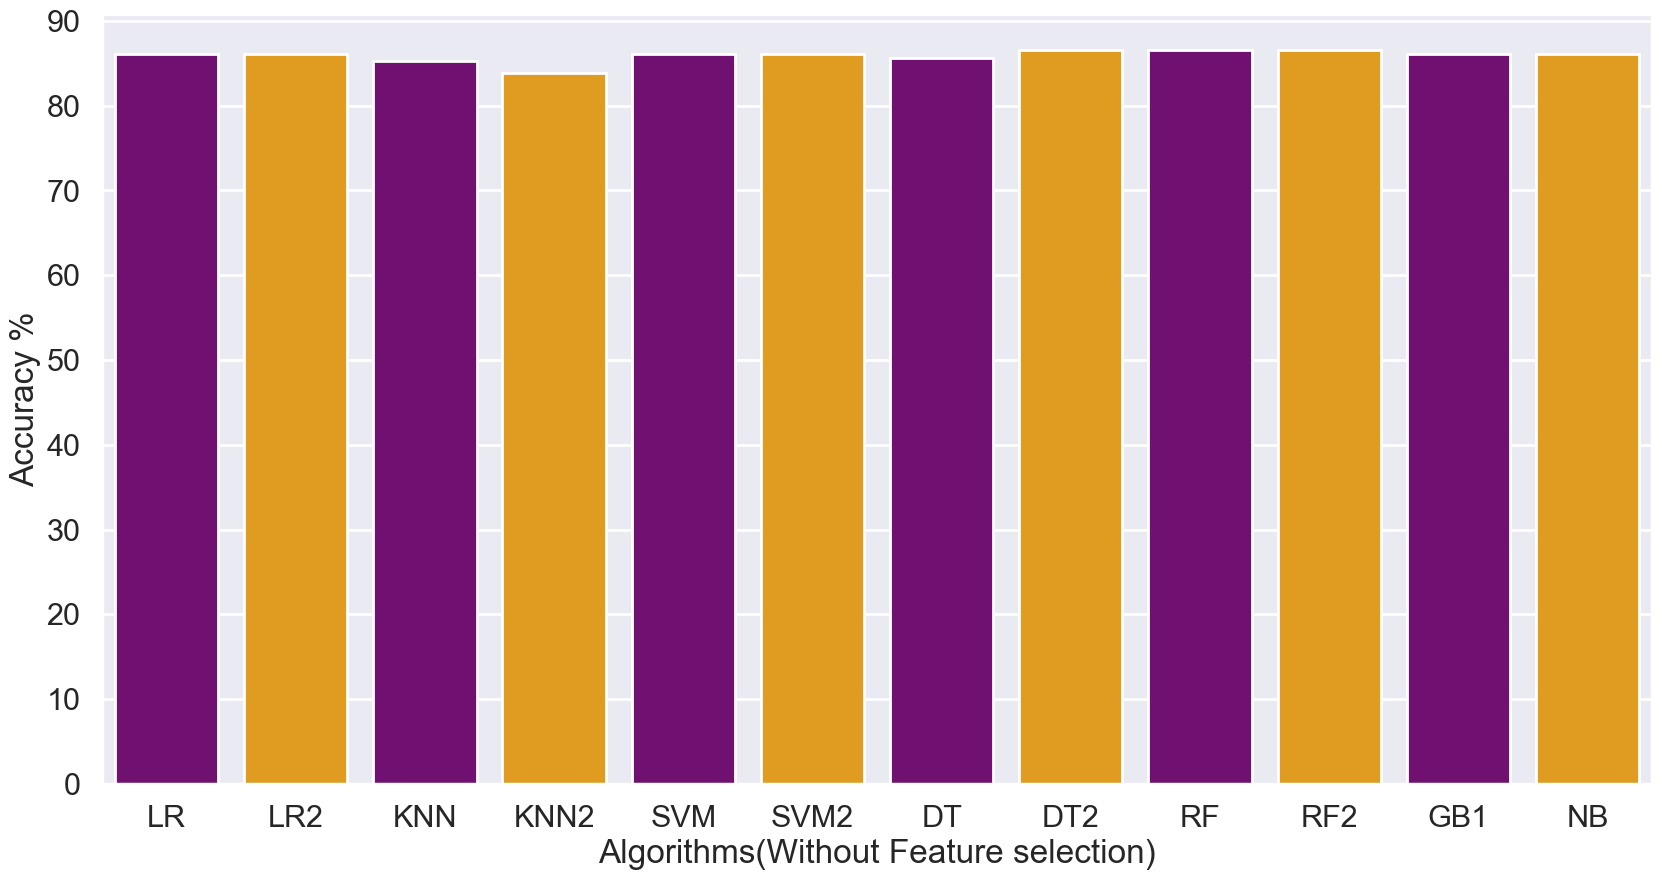

In [243]:
colors = ["purple", "orange"]

# sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms(Without Feature selection)")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()